In [13]:
from utils import *
import pickle
import pandas as pd
import json
import numpy as np


## Specify binary and biological inputs

In [3]:
input_signals_list_small_molecules = [
    {0: 0.0278, 1: 0.0022, 2: 0.0042},  # First set of input signals
    {0: 0.0278, 1: 0.0022, 2: 2.0082},  # Second set of input signals
    {0: 0.0278, 1: 5.0543, 2: 0.0042},  # Third set of input signals
    {0: 0.0278, 1: 5.0543, 2: 2.0082},  # First set of input signals
    {0: 3.9239, 1: 0.0022, 2: 0.0042},  # Second set of input signals
    {0: 3.9239, 1: 0.0022, 2: 2.0082},  # Third set of input signals    
    {0: 3.9239, 1: 5.0543, 2: 0.0042},  # Second set of input signals
    {0: 3.9239, 1: 5.0543, 2: 2.0082},  # Third set of input signals  
]    



input_signals_list_binary = [
    {0: 0, 1: 0, 2: 0},  # First set of input signals
    {0: 0, 1: 0, 2: 1},  # Second set of input signals
    {0: 0, 1: 1, 2: 0},  # Third set of input signals
    {0: 0, 1: 1, 2: 1},  # First set of input signals
    {0: 1, 1: 0, 2: 0},  # Second set of input signals
    {0: 1, 1: 0, 2: 1},  # Third set of input signals    
    {0: 1, 1: 1, 2: 0},  # Second set of input signals
    {0: 1, 1: 1, 2: 1},  # Third set of input signals  
]   

## Postech's library characterization

In [4]:
# Data
repressor_data = {
    "Repressor": ["AmeR", "AmtR", "BetI", "BM3R1", "BM3R1", "BM3R1", "HlyIIR", "IcaRA", "LitR", "LmrA", 
                  "PhlF", "PhlF", "PhlF", "PsrA", "QacR", "QacR", "SrpR", "SrpR", "SrpR", "SrpR"],
    "RBS": ["F1", "A1", "E1", "B1", "B2", "B3", "H1", "I1", "L1", "N1", 
            "P1", "P2", "P3", "R1", "Q1", "Q2", "S1", "S2", "S3", "S4"],
    "ymaxa": [3.835, 5.036, 3.065, 0.543, 0.822, 0.704, 2.462, 3.558, 4.296, 2.152,
              3.901, 6.505, 6.794, 6.489, 3.744, 3.778, 1.216, 2.556, 2.547, 3.314],
    "ymina": [1.06, 0.091, 1e-14, 0.002, 1e-14, 1e-14, 0.057, 1e-14, 0.074, 0.183,
              0.01, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14, 1e-14],
    "Ka": [0.122, 0.022, 0.363, 0.051, 0.285, 0.261, 1e-14, 0.186, 1e-14, 1e-14,
          1e-14, 0.16, 0.167, 0.305, 0.126, 0.456, 1e-14, 0.224, 0.4, 0.108],
    "n": [1.306, 1.308, 1.833, 2.042, 1.685, 1.768, 2.596, 1.085, 1.696, 2.095,
          4, 2.237, 2.01, 1.54, 1.706, 1.979, 1.66, 1.337, 1.569, 1.344],
    "Toxicity (RPU)": ["-", "-", "-", "-", "-", "-", 4.06525, 0.47094, "-", "-", 
                       "-", "-", "-", "-", 4.06525, "-", "-", "-", "-", "-"]
}

# Create DataFrame
cello_v1_hill_function_parameters = pd.DataFrame(repressor_data)

cello_v1_hill_function_parameters

,Repressor,RBS,ymaxa,ymina,Ka,n,Toxicity (RPU)
0,AmeR,F1,3.835,1.060000e+00,1.220000e-01,1.306,-
1,AmtR,A1,5.036,9.100000e-02,2.200000e-02,1.308,-
2,BetI,E1,3.065,1.000000e-14,3.630000e-01,1.833,-
3,BM3R1,B1,0.543,2.000000e-03,5.100000e-02,2.042,-
4,BM3R1,B2,0.822,1.000000e-14,2.850000e-01,1.685,-
5,BM3R1,B3,0.704,1.000000e-14,2.610000e-01,1.768,-
6,HlyIIR,H1,2.462,5.700000e-02,1.000000e-14,2.596,4.06525
7,IcaRA,I1,3.558,1.000000e-14,1.860000e-01,1.085,0.47094
8,LitR,L1,4.296,7.400000e-02,1.000000e-14,1.696,-
9,LmrA,N1,2.152,1.830000e-01,1.000000e-14,2.095,-


## Postech's toxicity data

In [5]:
# Load the JSON file
file_path = '/home/gridsan/spalacios/DRL1/supercloud-testing/ABC-and-PPO-testing1/gate_toxicity_POSTECH.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract all gate toxicity data
gate_toxicity_data = [item for item in data if item.get("collection") == "gate_toxicity"]

# Convert the list of dictionaries into a DataFrame
gate_toxicity_df = pd.DataFrame(gate_toxicity_data)

gate_toxicity_df.head()


,collection,gate_name,input,growth
0,gate_toxicity,F1_AmeR,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.936601827, 0.929528441, 0.927586207, 0.9..."
1,gate_toxicity,A1_AmtR,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 1.005567327, 0.987403446, 1.01189251, 1.01..."
2,gate_toxicity,E1_BetI,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 1.465830721, 1.017868339, 1.023301985, 1.0..."
3,gate_toxicity,B1_BM3R1,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.992753623, 0.971014493, 0.992914654, 0.9..."
4,gate_toxicity,B2_BM3R1,"[0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.1...","[1, 0.978445044, 1.001274554, 1.019855551, 0.9..."


## Load precomputed graphs

Library of 3-input 1-output

In [6]:
# Load graphs_library_3_input
with open('graphs_library_3_input_3_7.pkl', 'rb') as file:
    graphs_library_3_input = pickle.load(file)

# Load precomputed_graphs_3_input
with open('precomputed_graphs_3_input_3_7.pkl', 'rb') as file:
    precomputed_graphs_3_input = pickle.load(file)

Library of 2-input 1-output

In [7]:
# Load graphs_library_2_input
with open('graphs_library_2_input.pkl', 'rb') as file:
    graphs_library_2_input = pickle.load(file)

# Load precomputed_graphs_2_input
with open('precomputed_graphs_2_input.pkl', 'rb') as file:
    precomputed_graphs_2_input = pickle.load(file)

Library of 1-input 1-output


In [8]:

# Load graphs_library_1_input
with open('graphs_library_1_input.pkl', 'rb') as file:
    graphs_library_1_input = pickle.load(file)

# Load precomputed_graphs_1_input
with open('precomputed_graphs_1_input.pkl', 'rb') as file:
    precomputed_graphs_1_input = pickle.load(file)

## Calculate permutations without repeated repressors

In [15]:
# Elements to choose from
elements = list(range(20))  

# Number of elements/gates to choose
r = 6  

valid_permutations = generate_and_filter_permutations(elements, r)
# Save valid permutations to an HDF5 file

#file_path = 'valid_permutations_6_gates.h5'
#save_valid_permutations(valid_permutations, file_path)


len(valid_permutations)

Processing permutations: 100%|██████████| 27907200/27907200 [01:21<00:00, 340609.64it/s]


8739360

## Load permutations without repeated repressors

In [16]:
# Load valid permutations from the HDF5 file
file_path = 'valid_permutations_6_gates.h5'
valid_permutations = load_valid_permutations(file_path)
print(f"Total valid permutations loaded: {len(valid_permutations)}")
print("Example permutation:", valid_permutations[0] if valid_permutations else "No permutations found")

Total valid permutations loaded: 8739360
Example permutation: (0, 1, 2, 3, 6, 7)


Cello 2.0 0x46 circuit

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import concurrent.futures
import multiprocessing
from multiprocessing import Manager
import time
import os
import pickle
from matplotlib.patches import Patch

In [26]:
with open('output_run_postech_1_graphs.pkl', 'rb') as f:
    output_run_postech_1_graphs = pickle.load(f)


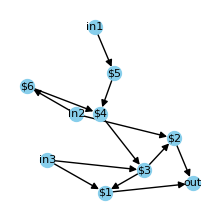

Nodes and their attributes:
Node $1:
Node out:
Node $2:
Node in3:
Node $3:
Node in2:
Node $4:
Node $5:
Node $6:
Node in1:


In [27]:
hex_string = "0x46"

G = output_run_postech_1_graphs[hex_string]

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()  

for node in G.nodes:
    G.nodes[node].clear()

# Step 3: Remove all edge attributes
for u, v in G.edges:
    G.edges[u, v].clear()


# Step 2: Print Node Attributes
print("Nodes and their attributes:")
for node, data in G.nodes(data=True):
    print(f"Node {node}:")
    for attr, value in data.items():
        print(f"  {attr}: {value}")

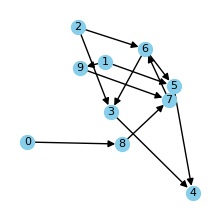

{3: [4],
 4: [],
 5: [4],
 2: [3, 6],
 6: [3, 5],
 1: [5, 9],
 7: [6],
 8: [7],
 9: [7],
 0: [8]}

In [28]:
relabel_mapping = {
    "in1": 0,
    "in2": 1,
    "in3": 2
}

# Starting index for the rest of the nodes
next_label = 3

# Iterate over all nodes and assign labels to those not in the initial mapping
for node in G.nodes:
    if node not in relabel_mapping:
        relabel_mapping[node] = next_label
        next_label += 1

# Step 3: Relabel the nodes
G = nx.relabel_nodes(G, relabel_mapping)

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()  

G_cello = G
# Print the adjacency list to verify the relabeling
adj_list = {node: list(G.successors(node)) for node in G.nodes}
adj_list

[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]]
Original graph


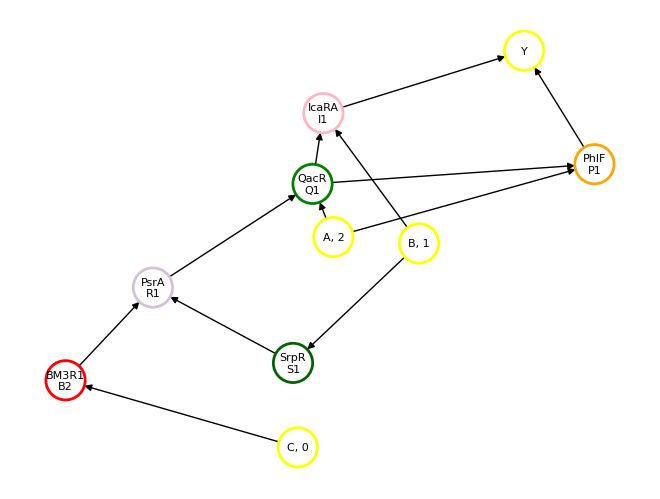

In [29]:
# Determine the size of the matrix
adjacency_list = adj_list

#n = max(adjacency_list.keys()) + 1
n = len(adjacency_list) 

# Initialize the adjacency matrix with zeros
adjacency_matrix = np.zeros((n, n), dtype=int)

# Fill the adjacency matrix based on the adjacency list
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        adjacency_matrix[node, neighbor] = 1

# Print the adjacency matrix
print(adjacency_matrix)


adj_matrix = adjacency_matrix
random_solution = random_part_selection(cello_v1_hill_function_parameters, n-4)
G_original = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution) 
print("Original graph")
draw_network_with_colors_and_labels_from_G(G_original)

In [30]:
calculate_truth_table(G_original)

{(0, 0, 0): (0,),
 (0, 0, 1): (0,),
 (0, 1, 0): (0,),
 (0, 1, 1): (0,),
 (1, 0, 0): (0,),
 (1, 0, 1): (0,),
 (1, 1, 0): (1,),
 (1, 1, 1): (0,)}

In [24]:
calculate_truth_table_v2(G_original)

{(0, 0, 0): (0,),
 (0, 0, 1): (1,),
 (0, 1, 0): (0,),
 (0, 1, 1): (0,),
 (1, 0, 0): (0,),
 (1, 0, 1): (1,),
 (1, 1, 0): (1,),
 (1, 1, 1): (0,)}

perm:  (0, 1, 2)
Permutation:


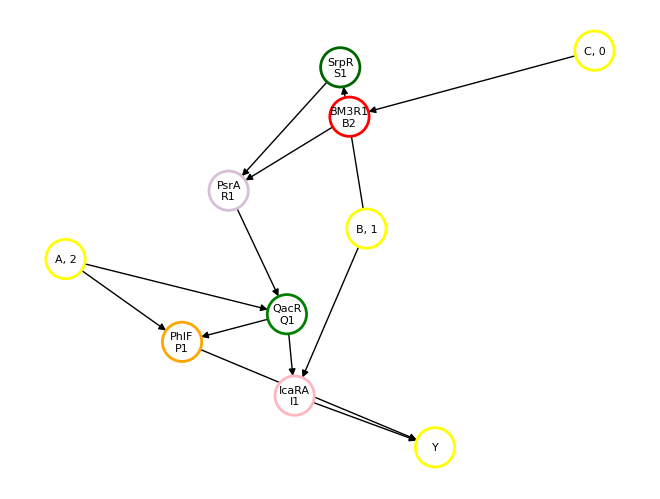

Available cores: 80
Skipping already processed batch 0
Skipping already processed batch 1
Skipping already processed batch 2
Skipping already processed batch 3
Skipping already processed batch 4
Skipping already processed batch 5
Skipping already processed batch 6
Skipping already processed batch 7
Skipping already processed batch 8
Processing completed.


Loading results:   0%|          | 0/9 [00:00<?, ?it/s]

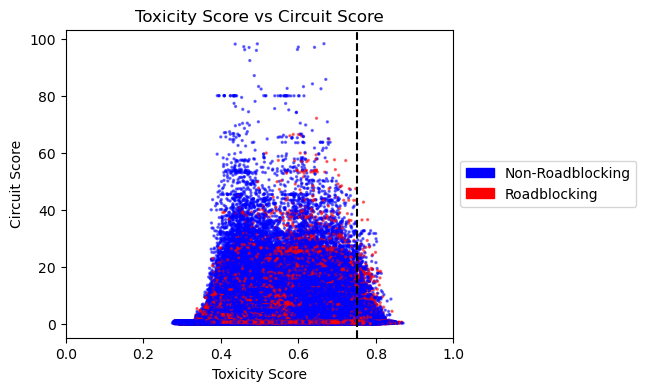

Index of the element with the largest circuit score: 2123440
Largest circuit score: 41.97947481591378
Corresponding toxicity score: 0.751617841561374
Roadblocking flag: False
Permutation: (12, 15, 1, 5, 19, 2)


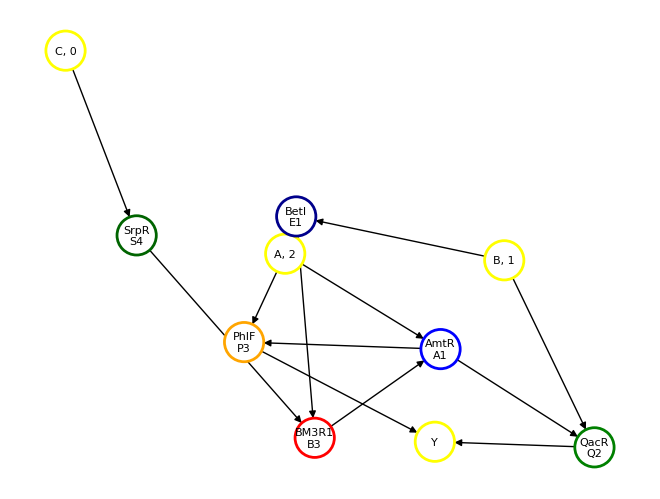

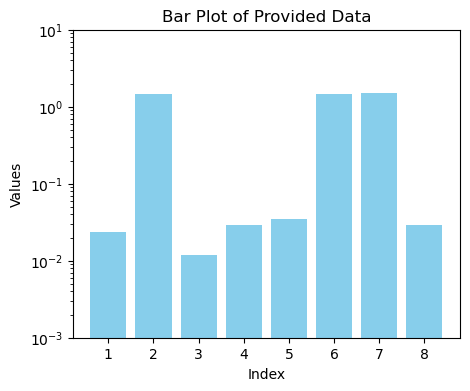

Generating subset of solutions in serial for testing


Processing solutions:   0%|          | 0/1000 [00:00<?, ?it/s]

Roadblocking flags match for all indices


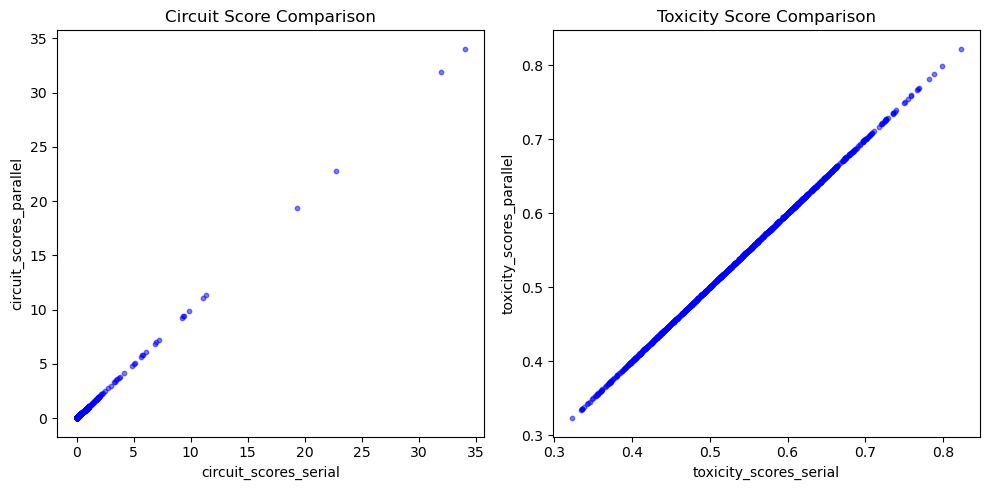

In [31]:
def permute_graph(graph, permutation):
    # Create a mapping from old node to new node
    mapping = {old: new for old, new in zip(input_nodes, permutation)}
    # Create a new graph with the permuted nodes
    permuted_graph = nx.relabel_nodes(graph, mapping)
    return permuted_graph


# Define the input nodes
input_nodes = [0, 1, 2]

# Generate all permutations of the input nodes
permutations = list(itertools.permutations(input_nodes))

# Create a list to store the permuted graphs
permuted_graphs = []

# Generate and store the permuted graphs
for perm in permutations:
    new_graph = permute_graph(G_original, perm)
    if calculate_truth_table_v2(new_graph) == calculate_truth_table_v2(G_original):
        print("perm: ", perm)
        permuted_graphs.append(new_graph)
    
    
for gi, Gi in enumerate(permuted_graphs):
    print("Permutation:")
    draw_network_with_colors_and_labels_from_G(Gi)   
    #truth_table = calculate_truth_table(G)
    #print(truth_table)

    nodelist = sorted(Gi.nodes())
    adj_matrix_sparse = nx.adjacency_matrix(Gi, nodelist=nodelist)
    adj_matrix_dense = adj_matrix_sparse.toarray()
    adj_matrix = adj_matrix_dense


    def process_permutation_batch(permutations):
        results = []

        for current_solution in permutations:
            Gp = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, current_solution)
            toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, Gp, gate_toxicity_df)
            actual_logic = simulate_signal_propagation(Gp, input_signals_list_small_molecules)
            current_score = calculate_circuit_score(expected_logic, actual_logic)
            roadblocking_flag = is_roadblocking(Gp)
            results.append((current_solution, toxicity_score, current_score, roadblocking_flag))
        return results



    #random_solution = random_part_selection(cello_v1_hill_function_parameters, 5)
    G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution)  
    expected_logic = simulate_signal_propagation_binary(G, input_signals_list_binary)
    
    
    hex_value = int(hex_string, 16)  # Convert the hex string to an integer
    # Format the hexadecimal number without leading zeros and add the '0x' prefix
    formatted_hex_value = f'0x{hex_value:X}'

    output_dir = f'exhaustive_gate_assignments_{formatted_hex_value}_Cello1_tox_function_{gi}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Define batch size to send at a time
    batch_size = 80*10 
    
    # Define the size to store in each file
    permutations_per_file = 1000000
    
    # Limit the number of cores used
    num_cores = min(multiprocessing.cpu_count(), 80)
    
    print("Available cores:", num_cores)
    
    # Determine which batches have already been processed
    processed_batches = set()
    for file in os.listdir(output_dir):
        if file.startswith("results_batch_") and file.endswith(".pkl"):
            batch_num = int(file[len("results_batch_"):-len(".pkl")])
            processed_batches.add(batch_num)
    
    start_time = time.time()
    
    batch_number = 0
    for start_idx in range(0, len(valid_permutations), permutations_per_file):
        end_idx = min(start_idx + permutations_per_file, len(valid_permutations))
        valid_permutations_to_test = valid_permutations[start_idx:end_idx]
    
        # Skip already processed batches
        if batch_number in processed_batches:
            print(f"Skipping already processed batch {batch_number}")
            batch_number += 1
            continue
    
        all_results = []
    
        with concurrent.futures.ProcessPoolExecutor(max_workers=num_cores) as executor:
            futures = []
            for i in range(0, len(valid_permutations_to_test), batch_size):
                batch = valid_permutations_to_test[i:i + batch_size]
                futures.append(executor.submit(process_permutation_batch, batch))
    
            progress_bar = tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing batch {batch_number}", unit="batch")
    
            for future in progress_bar:
                batch_results = future.result()
                all_results.extend(batch_results)
    
                elapsed_time = time.time() - start_time
                completed_batches = len(all_results) // batch_size
                total_batches = len(valid_permutations_to_test) // batch_size
                remaining_batches = total_batches - completed_batches
                time_per_batch = elapsed_time / completed_batches if completed_batches > 0 else 0
                remaining_time = remaining_batches * time_per_batch
    
                progress_bar.set_postfix({
                    'Elapsed Time': f'{elapsed_time:.2f}s',
                    'Remaining Time': f'{remaining_time:.2f}s'
                })
    
        # Save the results to a file using pickle
        with open(os.path.join(output_dir, f"results_batch_{batch_number}.pkl"), 'wb') as f:
            pickle.dump(all_results, f)
        
        batch_number += 1
    
    print("Processing completed.")


    # Initialize lists to store loaded results
    all_permutations = []
    all_toxicity_scores = []
    all_circuit_scores = []
    all_roadblocking_flags = []

    # Get the list of result files
    files = [file for file in os.listdir(output_dir) if file.endswith('.pkl')]

    # Load all results with progress bar
    for file in tqdm(files, desc="Loading results"):
        with open(os.path.join(output_dir, file), 'rb') as f:
            results = pickle.load(f)
            for result in results:
                all_permutations.append(result[0])
                all_toxicity_scores.append(result[1])
                all_circuit_scores.append(result[2])
                all_roadblocking_flags.append(result[3][0])

    # Plot the results
    plt.figure(figsize=(5, 4))
    scatter = plt.scatter(all_toxicity_scores, all_circuit_scores, alpha=0.5, s=2, c=np.where(all_roadblocking_flags, 'red', 'blue'))
    plt.axvline(x=0.75, color='k', linestyle='--')
    plt.xlim(0, 1)  # Set the x-axis limits between 0 and 1
    #plt.yscale('log')
    plt.xlabel('Toxicity Score')
    plt.ylabel('Circuit Score')
    plt.title('Toxicity Score vs Circuit Score')

    # Add legend
    legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='Non-Roadblocking'),
                       Patch(facecolor='red', edgecolor='red', label='Roadblocking')]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

    max_index = -1
    max_value = -float('inf')

    for i in range(len(all_circuit_scores)):
        if all_toxicity_scores[i] > 0.75 and not all_roadblocking_flags[i]:
            if all_circuit_scores[i] > max_value:
                max_value = all_circuit_scores[i]
                max_index = i

    print("Index of the element with the largest circuit score:", max_index)
    print("Largest circuit score:", max_value)
    print("Corresponding toxicity score:", all_toxicity_scores[max_index])
    print("Roadblocking flag:", all_roadblocking_flags[max_index])
    print("Permutation:", all_permutations[max_index])

    G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, all_permutations[max_index])
    
    #cello2_tox_score, cello2_detailed_results = cello2_calculate_toxicity_score(input_signals_list_small_molecules, G, gate_toxicity_df)
    #print("Cello 2 tox score (corrected):", cello2_tox_score)
    
    draw_network_with_colors_and_labels_from_G(G)
    actual_logic = simulate_signal_propagation(G, input_signals_list_small_molecules)
    
    
    # Extract values for plotting
    values = [list(item.values())[0] for item in actual_logic]

    # Create the bar plot
    plt.figure(figsize=(5, 4))
    plt.bar(range(len(values)), values, color='skyblue')

    # Set the y-axis to logarithmic scale
    plt.yscale('log')
    plt.ylim(1e-3, 1e1)

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Bar Plot of Provided Data')
    plt.xticks(range(len(values)), range(1, len(values) + 1))

    # Show the plot
    plt.show()
    
    

    # Multi-core testing: 
    
    
    #all_circuit_scores
    #all_toxicity_scores
    #all_roadblocking_flags
    #all_permutations
    print("Generating subset of solutions in serial for testing")
    circuit_scores_serial = []
    toxicity_scores_serial = []
    roadblocking_flags_serial = []

    random_indices = random_indices = random.sample(range(len(all_permutations)), 1000 )

    for index in tqdm(random_indices, desc="Processing solutions"):
    
        current_solution = all_permutations[index]  
    
        Gtest = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, current_solution)
        toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, Gtest, gate_toxicity_df)
        actual_logic = simulate_signal_propagation(Gtest, input_signals_list_small_molecules)
        current_score = calculate_circuit_score(expected_logic, actual_logic)
        roadblocking_flag = is_roadblocking(Gtest)
        
        circuit_scores_serial.append(current_score)
        toxicity_scores_serial.append(toxicity_score)
        roadblocking_flags_serial.append(roadblocking_flag[0])

    # Subset the parallel data using random_indices
    parallel_circuit_scores = [all_circuit_scores[i] for i in random_indices]
    parallel_toxicity_scores = [all_toxicity_scores[i] for i in random_indices]
    parallel_roadblocking_flags = [all_roadblocking_flags[i] for i in random_indices]

    # Plotting comparisons
    plt.figure(figsize=(10, 5))

    # Plot Circuit Scores
    plt.subplot(1, 2, 1)
    plt.scatter(circuit_scores_serial, parallel_circuit_scores, c='blue', alpha=0.5, s=10)
    #plt.scatter(random_indices, circuit_scores_serial, alpha=0.5, s=50, c='red', label='Serial')
    plt.xlabel('circuit_scores_serial')
    plt.ylabel('circuit_scores_parallel')
    plt.title('Circuit Score Comparison')

    # Plot Toxicity Scores
    plt.subplot(1, 2, 2)
    plt.scatter(toxicity_scores_serial, parallel_toxicity_scores, c='blue', alpha=0.5, s=10)
    #plt.scatter(random_indices, toxicity_scores_serial, alpha=0.5, s=50, c='red', label='Serial')
    plt.xlabel('toxicity_scores_serial')
    plt.ylabel('toxicity_scores_parallel')
    plt.title('Toxicity Score Comparison')
    
    # Checking if roadblocking flags are the same
    flags_match = [p_flag == s_flag for p_flag, s_flag in zip(parallel_roadblocking_flags, roadblocking_flags_serial)]
    all_flags_match = all(flags_match)

    print("Roadblocking flags match for all indices" if all_flags_match else "Roadblocking flags do not match for all indices")
    #for idx, match in enumerate(flags_match):
    #    print(f"Index {random_indices[idx]}: {'Match' if match else 'Do not match'}")
    
   
    

    plt.tight_layout()
    plt.show()    
    
    

In [189]:
permuted_graphs[0]


Investigate toxicity

In [ ]:
max_index = -1
max_value = -float('inf')

for i in range(len(all_circuit_scores)):
    if all_toxicity_scores[i] < 0.1 and not all_roadblocking_flags[i]:
        if all_circuit_scores[i] > max_value:
            max_value = all_circuit_scores[i]
max_index = i

print("Index of the element with the largest circuit score:", max_index)
print("Largest circuit score:", max_value)
print("Corresponding toxicity score:", all_toxicity_scores[max_index])
print("Roadblocking flag:", all_roadblocking_flags[max_index])

G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, all_permutations[max_index])
draw_network_with_colors_and_labels_from_G(G)

In [212]:
G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, all_permutations[max_index])
toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, G, gate_toxicity_df)

0
0
0.9423651708078333
0.9423651708078333
0
0
0.9423651708078333
0.9423651708078333


In [205]:
all_permutations[max_index]


(2, 19, 15, 13, 11)

In [206]:
for node, attrs in G.nodes(data=True):
    print(f"Node {node}: {attrs}")

Node 0: {'type': 'input'}
Node 1: {'type': 'input'}
Node 2: {'type': 'input'}
Node 3: {'Repressor': 'BetI', 'RBS': 'E1', 'ymaxa': 3.065, 'ymina': 1e-14, 'Ka': 0.363, 'n': 1.833, 'Toxicity (RPU)': '-'}
Node 4: {'Repressor': 'SrpR', 'RBS': 'S4', 'ymaxa': 3.314, 'ymina': 1e-14, 'Ka': 0.108, 'n': 1.344, 'Toxicity (RPU)': '-'}
Node 5: {'Repressor': 'QacR', 'RBS': 'Q2', 'ymaxa': 3.778, 'ymina': 1e-14, 'Ka': 0.456, 'n': 1.979, 'Toxicity (RPU)': '-'}
Node 6: {'Repressor': 'PsrA', 'RBS': 'R1', 'ymaxa': 6.489, 'ymina': 1e-14, 'Ka': 0.305, 'n': 1.54, 'Toxicity (RPU)': '-'}
Node 7: {'Repressor': 'PhlF', 'RBS': 'P2', 'ymaxa': 6.505, 'ymina': 1e-14, 'Ka': 0.16, 'n': 2.237, 'Toxicity (RPU)': '-'}
Node 8: {'type': 'output'}


In [207]:
toxicity_score

0.0

In [208]:
detailed_results

{'outputs': [{8: 0.0016859241667032648},
  {8: 0.0021446095214263604},
  {8: 0.0020651577384546253},
  {8: 3.087129821439658},
  {8: 0.0005833486878907461},
  {8: 0.0006755131857592929},
  {8: 0.0006604155601121611},
  {8: 0.004681981983132779}],
 'intermediates': [[(3, 0.0022),
   (4, 0.0042),
   (5, 6.337088730311077),
   (6, 0.02056096415742297),
   (7, 6.416414295907051)],
  [(3, 0.0022),
   (4, 2.0082),
   (5, 3.1286856922838955),
   (6, 0.08175805352238469),
   (7, 5.761821473847081)],
  [(3, 5.0543),
   (4, 0.0042),
   (5, 3.2967009065369166),
   (6, 0.07387502321799726),
   (7, 5.8599131887926)],
  [(3, 5.0543),
   (4, 2.0082),
   (5, 0.088297868509735),
   (6, 3.636853576557641),
   (7, 0.16744758461868753)],
  [(3, 0.0022),
   (4, 0.0042),
   (5, 6.337088730311077),
   (6, 0.02056096415742297),
   (7, 10.312514295907052)],
  [(3, 0.0022),
   (4, 2.0082),
   (5, 3.1286856922838955),
   (6, 0.08175805352238469),
   (7, 9.65792147384708)],
  [(3, 5.0543),
   (4, 0.0042),
   (5, 

In [201]:
data = {
    'outputs': [
        {8: 0.0016859241667032648},
        {8: 0.0021446095214263604},
        {8: 0.0020651577384546253},
        {8: 3.087129821439658},
        {8: 0.0005833486878907461},
        {8: 0.0006755131857592929},
        {8: 0.0006604155601121611},
        {8: 0.004681981983132779}
    ],
    'intermediates': [
        [(3, 0.0022), (4, 0.0042), (5, 6.337088730311077), (6, 0.02056096415742297), (7, 6.416414295907051)],
        [(3, 0.0022), (4, 2.0082), (5, 3.1286856922838955), (6, 0.08175805352238469), (7, 5.761821473847081)],
        [(3, 5.0543), (4, 0.0042), (5, 3.2967009065369166), (6, 0.07387502321799726), (7, 5.8599131887926)],
        [(3, 5.0543), (4, 2.0082), (5, 0.088297868509735), (6, 3.636853576557641), (7, 0.16744758461868753)],
        [(3, 0.0022), (4, 0.0042), (5, 6.337088730311077), (6, 0.02056096415742297), (7, 10.312514295907052)],
        [(3, 0.0022), (4, 2.0082), (5, 3.1286856922838955), (6, 0.08175805352238469), (7, 9.65792147384708)],
        [(3, 5.0543), (4, 0.0042), (5, 3.2967009065369166), (6, 0.07387502321799726), (7, 9.7560131887926)],
        [(3, 5.0543), (4, 2.0082), (5, 0.088297868509735), (6, 3.636853576557641), (7, 4.0635475846186875)]
    ],
    'growth_scores': [
        [(3, 0), (4, 1), (5, 0.93119745), (6, 0.98027668), (7, 0.95218084)],
        [(3, 0), (4, 0.98766206), (5, 0.95143807), (6, 0.95336118), (7, 0.95114766)],
        [(3, 0.94236517), (4, 1), (5, 0.94993798), (6, 0.95473205), (7, 0.95130974)],
        [(3, 0.94236517), (4, 0.98766206), (5, 1), (6, 0.91150462), (7, 0.92536906)],
        [(3, 0), (4, 1), (5, 0.93119745), (6, 0.98027668), (7, 0.95673674)],
        [(3, 0), (4, 0.98766206), (5, 0.95143807), (6, 0.95336118), (7, 0.95610708)],
        [(3, 0.94236517), (4, 1), (5, 0.94993798), (6, 0.95473205), (7, 0.95620411)],
        [(3, 0.94236517), (4, 0.98766206), (5, 1), (6, 0.91150462), (7, 0.94779484)]
    ],
    'multiplied_growth_scores': [
        0.0, 0.0, 0.8130512563422069, 0.7850574593920799, 0.0, 0.0, 0.817234296053197, 0.8040828659729674
    ]
}



AI-designed 0x46 circuit

In [46]:
hex_string = "0x46"

with open('unique_graphs_0x46.pkl', 'rb') as f:
    unique_graphs = pickle.load(f)
unique_graphs    

In [47]:
calculate_truth_table_v2(unique_graphs[0])

{(0, 0, 0): (0,),
 (0, 0, 1): (1,),
 (0, 1, 0): (0,),
 (0, 1, 1): (0,),
 (1, 0, 0): (0,),
 (1, 0, 1): (1,),
 (1, 1, 0): (1,),
 (1, 1, 1): (0,)}

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import concurrent.futures
import multiprocessing
from multiprocessing import Manager
import time
import os
import pickle
from matplotlib.patches import Patch

Find topologies that are not isomprphic to the library 

In [49]:
#Conver unique graphs to include the implicit OR

unique_graphs_with_implicit_OR = []

for k in tqdm(range(0, len(unique_graphs))):

    G_optimized = unique_graphs[k]

    exit_nodes = [node for node in G_optimized.nodes() if G_optimized.out_degree(node) == 0]
    output_node = exit_nodes[0]
    size_input_to_OR_gate = 2
    max_removal = 0
    max_implicit_OR_key = None 
    implicit_OR_results = check_implicit_OR_existence_v2(G_optimized, output_node, size_input_to_OR_gate)

    for key, value in implicit_OR_results.items():
        # Check if this entry has an implicit OR and if the number of nodes that can be removed is larger than the current max
        if value['is_there_an_implicit_OR'] and value['number_of_nodes_available_for_removal'] > max_removal:
            max_removal = value['number_of_nodes_available_for_removal']
            max_implicit_OR_key = key   


    if (value['is_there_an_implicit_OR']):
        cut = implicit_OR_results[max_implicit_OR_key]['cut']
        cone = implicit_OR_results[max_implicit_OR_key]['cone']
        G_optimized_with_implicit_OR = add_implicit_OR_to_dag_v2(G_optimized, output_node, cut, cone)
        unique_graphs_with_implicit_OR.append(G_optimized_with_implicit_OR)
        #visualize_graph_rewriting(G_optimized_with_implicit_OR)
        #truth_table = calculate_truth_table_v2(G_optimized_with_implicit_OR)
    else:
        unique_graphs_with_implicit_OR.append(G_optimized)
        #visualize_graph_rewriting(G_optimized)
        #truth_table = calculate_truth_table_v2(G_optimized) 

  0%|          | 0/8 [00:00<?, ?it/s]

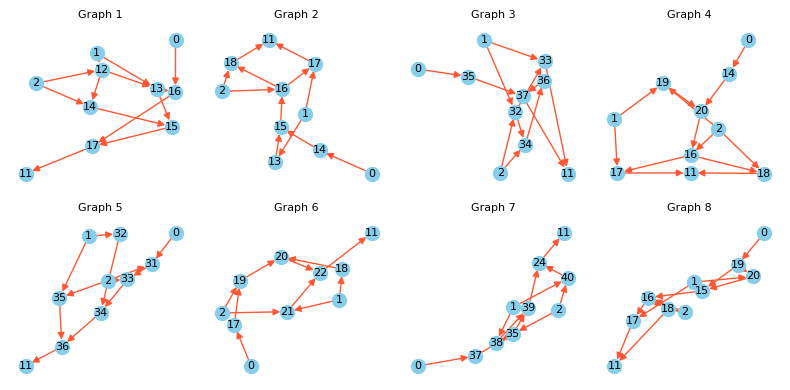

In [50]:
num_cols  = 4
# Calculate number of rows needed
num_rows = (len(unique_graphs_with_implicit_OR) + num_cols - 1) // num_cols  

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

i = 0
for graph in unique_graphs_with_implicit_OR:
    ax = axes[i]
    ax.set_title(f'Graph {i+1}', fontsize=8)
    pos = nx.spring_layout(graph)  # positions for all nodes
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color='skyblue', edge_color='#FF5733', node_size=100, font_size=8)
    ax.axis('off')  # Turn off axis
    i = i + 1

# Turn off any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#0 is iso.
# 1, 3, 7 similar to library 
# Candidates: 5, 6

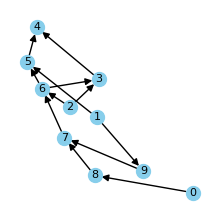

In [51]:
#Cello topology
plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G_cello)  # Positions for all nodes
nx.draw(G_cello, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()  

In [52]:
circuit_hex = hex_string
circuit_decimal = int(circuit_hex, 16)
associated_graphs = precomputed_graphs_3_input[circuit_decimal]
graphs_in_precomputed_library = [graphs_library_3_input[i] for i in associated_graphs]


graphs_in_precomputed_library_implicit_OR = []

for k in tqdm(range(0, len(graphs_in_precomputed_library))):

    G_optimized = graphs_in_precomputed_library[k]

    exit_nodes = [node for node in G_optimized.nodes() if G_optimized.out_degree(node) == 0]
    output_node = exit_nodes[0]
    size_input_to_OR_gate = 2
    max_removal = 0
    max_implicit_OR_key = None 
    implicit_OR_results = check_implicit_OR_existence_v2(G_optimized, output_node, size_input_to_OR_gate)

    for key, value in implicit_OR_results.items():
        # Check if this entry has an implicit OR and if the number of nodes that can be removed is larger than the current max
        if value['is_there_an_implicit_OR'] and value['number_of_nodes_available_for_removal'] > max_removal:
            max_removal = value['number_of_nodes_available_for_removal']
            max_implicit_OR_key = key   


    if (value['is_there_an_implicit_OR']):
        cut = implicit_OR_results[max_implicit_OR_key]['cut']
        cone = implicit_OR_results[max_implicit_OR_key]['cone']
        G_optimized_with_implicit_OR = add_implicit_OR_to_dag_v2(G_optimized, output_node, cut, cone)
        graphs_in_precomputed_library_implicit_OR.append(G_optimized_with_implicit_OR)
        #visualize_graph_rewriting(G_optimized_with_implicit_OR)
        #truth_table = calculate_truth_table_v2(G_optimized_with_implicit_OR)
    else:
        graphs_in_precomputed_library_implicit_OR.append(G_optimized)
        #visualize_graph_rewriting(G_optimized)
        #truth_table = calculate_truth_table_v2(G_optimized) 




  0%|          | 0/4 [00:00<?, ?it/s]

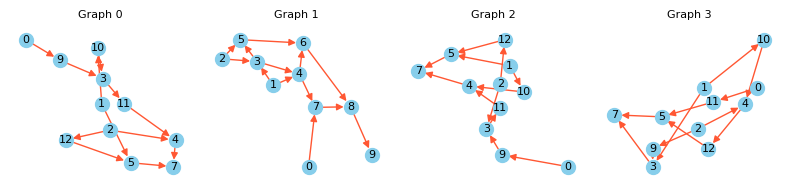

In [53]:
num_cols = 4
# Calculate number of rows needed
num_rows = (len(graphs_in_precomputed_library_implicit_OR) + num_cols - 1) // num_cols

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each graph
for i, graph in enumerate(graphs_in_precomputed_library_implicit_OR):
    ax = axes[i]
    ax.set_title(f'Graph {i}', fontsize=8)
    pos = nx.spring_layout(graph)  # positions for all nodes
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color='skyblue', edge_color='#FF5733', node_size=100, font_size=8)
    ax.axis('off')  # Turn off axis

# Turn off any remaining empty subplots
for j in range(len(graphs_in_precomputed_library_implicit_OR), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Only graph 1 has no OR and minimum size

In [43]:
# This cell gets the indices of the isomorphic graphs designed with ML

def find_isomorphic_indices(unique_graphs, precomputed_graphs):
    isomorphic_indices = []
    
    for i, u_graph in enumerate(unique_graphs):
        for p_graph in precomputed_graphs:
            if nx.is_isomorphic(u_graph, p_graph):
                isomorphic_indices.append(i)
                break
                
    return isomorphic_indices


isomorphic_indices = find_isomorphic_indices(unique_graphs_with_implicit_OR, graphs_in_precomputed_library_implicit_OR)
print(isomorphic_indices)



[0]


Analyze edit distance to Cello

In [99]:
# Distance threshold
distance_threshold = 2

indexes_of_similar_graphs_to_Cello = []
for l in tqdm(range(0, len(unique_graphs_with_implicit_OR)), desc="Processing Graphs"):
    G2 = unique_graphs_with_implicit_OR[l]
    unique_graphs_with_implicit_OR
    distance = nx.graph_edit_distance(G_cello, G2)
    print(f"Graph Edit Distance: {distance}")
    if distance < distance_threshold:
        indexes_of_similar_graphs_to_Cello.append(l)


Processing Graphs:   0%|          | 0/8 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
indexes_of_similar_graphs_to_Cello

Analyze edit distance to precomputed library

In [55]:
import networkx as nx
from tqdm import tqdm

# Distance threshold
distance_threshold = 2

# List to store indexes of unique graphs with distance less than 2
indexes_of_similar_graphs_to_precomputed_library = []

# Iterate through each graph in unique_graphs_with_implicit_OR
for i, G1 in enumerate(tqdm(unique_graphs_with_implicit_OR, desc="Processing unique graphs")):
    
    #Only check graph 5
    if i not in [5]:
        print("Continue")
        continue
    
    
    # Iterate through each graph in graphs_in_precomputed_library_implicit_OR
    for j, G2 in enumerate(graphs_in_precomputed_library_implicit_OR):
        


        # Compute the graph edit distance
        if nx.is_isomorphic(G1, G2):
            distance = 0.0
        else:
            distance = nx.graph_edit_distance(G1, G2)
        #print(f"Graph {j} in graphs_in_precomputed_library_implicit_OR - Edit Distance: {distance}")
        # Check if the distance is less than distance
        if distance is not None and distance < distance_threshold:
            indexes_of_similar_graphs_to_precomputed_library.append(i)

        print(f"Graph {i} in unique_graphs_with_implicit_OR as compated to a graph in the precomputed library has distance {distance}")

# Print the results
print("\nIndexes of unique graphs with edit distance less than 2 to any graph in the precomputed library:")
print(indexes_of_similar_graphs_to_precomputed_library)


Processing unique graphs:   0%|          | 0/8 [00:00<?, ?it/s]

Continue
Continue
Continue
Continue
Continue
Graph 5 in unique_graphs_with_implicit_OR as compated to a graph in the precomputed library has distance 8.0
Graph 5 in unique_graphs_with_implicit_OR as compated to a graph in the precomputed library has distance 6.0
Graph 5 in unique_graphs_with_implicit_OR as compated to a graph in the precomputed library has distance 6.0


Processing unique graphs: 100%|██████████| 8/8 [09:23<00:00, 70.47s/it]

Graph 5 in unique_graphs_with_implicit_OR as compated to a graph in the precomputed library has distance 6.0
Continue
Continue

Indexes of unique graphs with edit distance less than 2 to any graph in the precomputed library:
[]


In [ ]:
indexes_of_similar_graphs_to_precomputed_library

Make final list of graphs to characterize

In [ ]:
iso_and_similar_indices = isomorphic_indices + indexes_of_similar_graphs_to_Cello


In [ ]:
# Format the file name with the additional hex_string
filename = f'iso_and_similar_indices_{hex_string}.json'

# Save the combined indices to a file with the formatted filename
with open(filename, 'w') as f:
    json.dump(iso_and_similar_indices, f)
print(f"Indices saved to {filename}")

In [100]:
filename = f'iso_and_similar_indices_{hex_string}.json'

In [102]:
with open(filename, 'r') as f:
    iso_and_similar_indices = json.load(f)
iso_and_similar_indices    

[1, 3, 7]

In [102]:
unique_graphs_non_iso_and_non_similar = [graph for idx, graph in enumerate(unique_graphs) if idx not in iso_and_similar_indices]
unique_graphs_non_iso_and_non_similar_implicit_OR = [graph for idx, graph in enumerate(unique_graphs_with_implicit_OR) if idx not in iso_and_similar_indices]

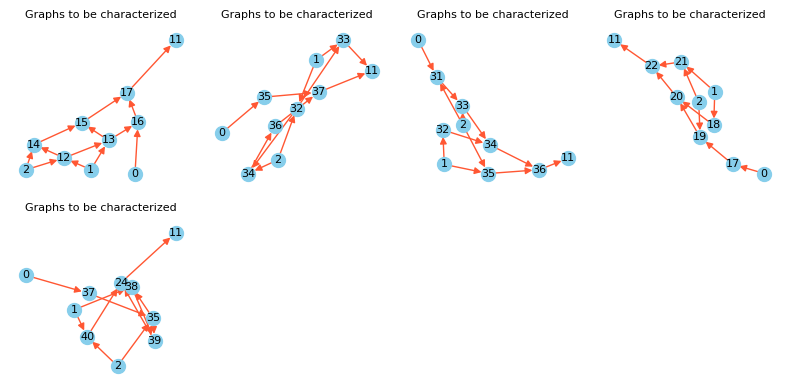

In [103]:
num_cols  = 4
# Calculate number of rows needed
num_rows = (len(unique_graphs_non_iso_and_non_similar_implicit_OR) + num_cols - 1) // num_cols  

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

i = 0
for graph in unique_graphs_non_iso_and_non_similar_implicit_OR:
    ax = axes[i]
    ax.set_title("Graphs to be characterized", fontsize=8)
    pos = nx.spring_layout(graph)  # positions for all nodes
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color='skyblue', edge_color='#FF5733', node_size=100, font_size=8)
    ax.axis('off')  # Turn off axis
    i = i + 1

# Turn off any remaining empty subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Exhausive gate assignments

k is:  5
Original graph


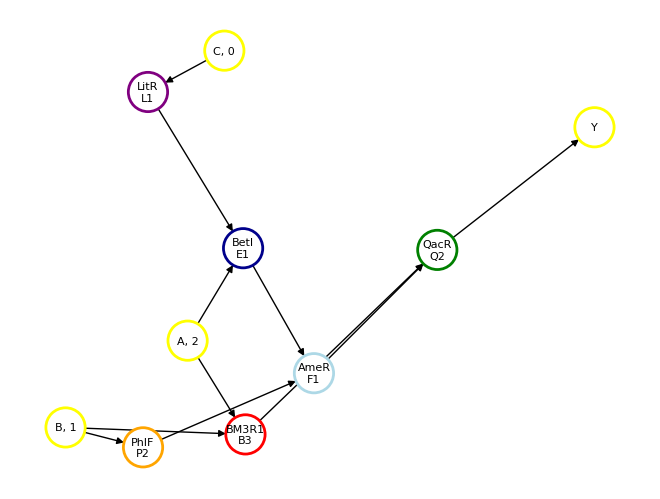

perm:  (0, 1, 2)


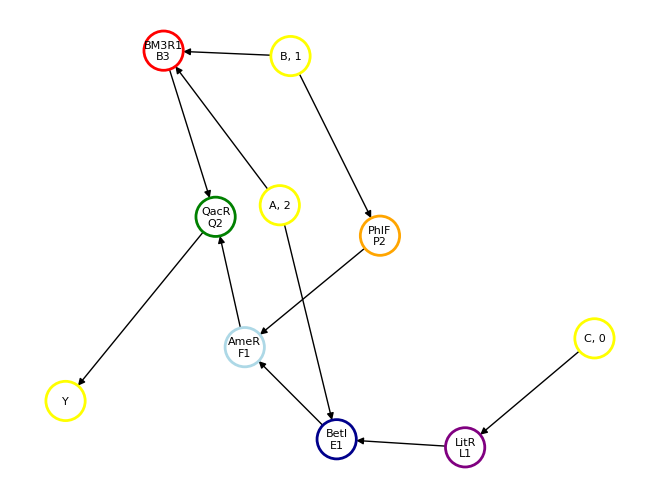

Available cores: 80
Skipping already processed batch 0
Skipping already processed batch 1
Skipping already processed batch 2
Skipping already processed batch 3
Skipping already processed batch 4
Skipping already processed batch 5
Skipping already processed batch 6
Skipping already processed batch 7
Skipping already processed batch 8
Processing completed.


Loading results: 100%|██████████| 9/9 [01:19<00:00,  8.83s/it]
IOStream.flush timed out


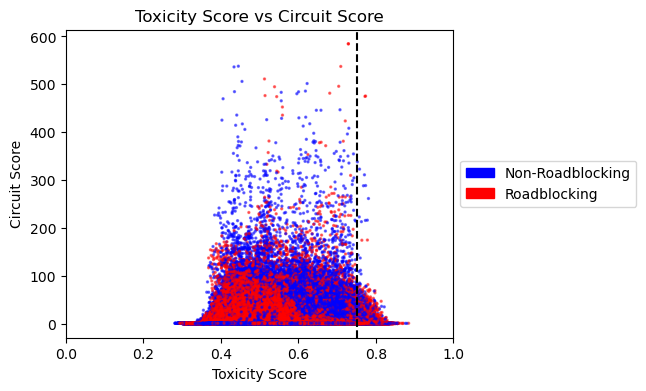

Index of the element with the largest circuit score: 394669
Largest circuit score: 337.9852565861829
Corresponding toxicity score: 0.7522136312360919
Roadblocking flag: False
Permutation: (4, 15, 1, 2, 19, 11)


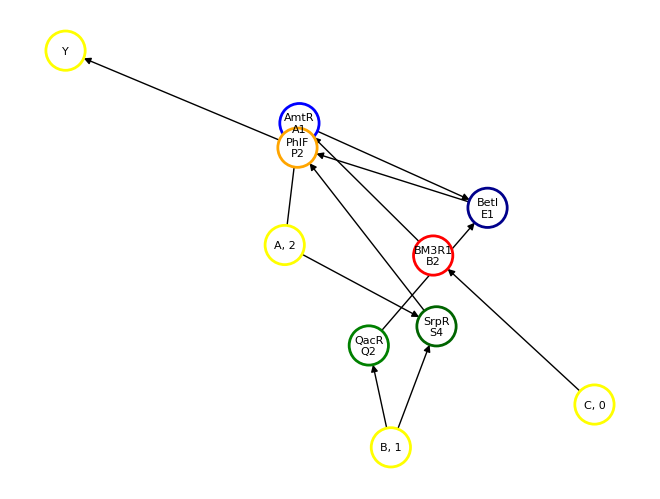

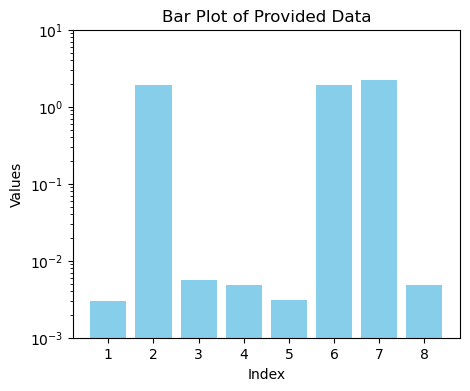

Generating subset of solutions in serial for testing


Processing solutions: 100%|██████████| 10000/10000 [03:35<00:00, 46.32it/s]


Roadblocking flags match for all indices


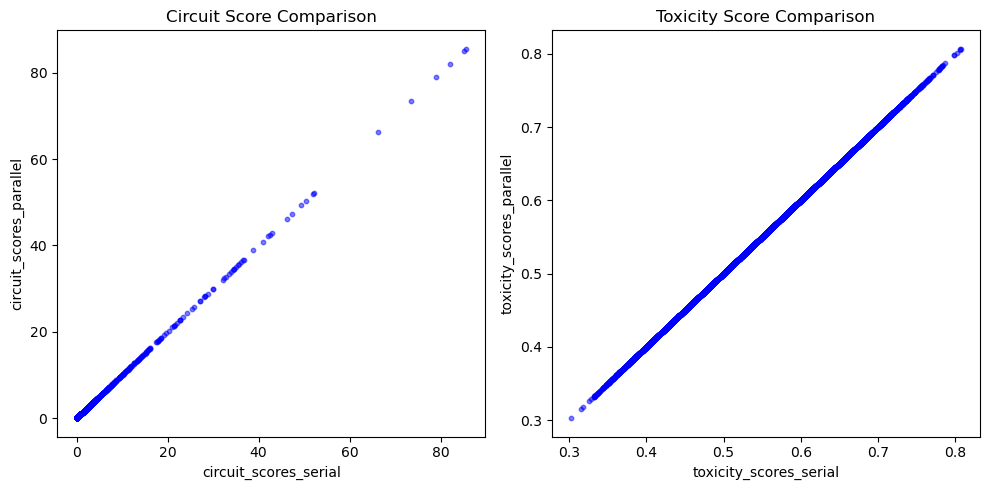

In [56]:
for k in [5]:

    G_optimized = unique_graphs_with_implicit_OR[k]
    print("k is: ", k)
    if check_implicit_OR_existence(G_optimized):
        G_optimized_with_implicit_OR = add_implicit_OR_to_dag(G_optimized)
        adj_matrix_sparse = nx.adjacency_matrix(G_optimized_with_implicit_OR)
        adj_matrix_dense = adj_matrix_sparse.toarray()
    else:
        #G_optimized_with_implicit_OR = G_optimized
        adj_matrix_sparse = nx.adjacency_matrix(G_optimized)
        adj_matrix_dense = adj_matrix_sparse.toarray()

    adj_matrix = adj_matrix_dense
    random_solution = random_part_selection(cello_v1_hill_function_parameters, 6)
    G_original = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution) 
    print("Original graph")
    draw_network_with_colors_and_labels_from_G(G_original)
    
    input_signals_list_small_molecules = [
        {0: 0.0278, 1: 0.0022, 2: 0.0042},  # First set of input signals
        {0: 0.0278, 1: 0.0022, 2: 2.0082},  # Second set of input signals
        {0: 0.0278, 1: 5.0543, 2: 0.0042},  # Third set of input signals
        {0: 0.0278, 1: 5.0543, 2: 2.0082},  # First set of input signals
        {0: 3.9239, 1: 0.0022, 2: 0.0042},  # Second set of input signals
        {0: 3.9239, 1: 0.0022, 2: 2.0082},  # Third set of input signals    
        {0: 3.9239, 1: 5.0543, 2: 0.0042},  # Second set of input signals
        {0: 3.9239, 1: 5.0543, 2: 2.0082},  # Third set of input signals  
    ]
    
    input_signals_list_binary = [
        {0: 0, 1: 0, 2: 0},  # First set of input signals
        {0: 0, 1: 0, 2: 1},  # Second set of input signals
        {0: 0, 1: 1, 2: 0},  # Third set of input signals
        {0: 0, 1: 1, 2: 1},  # First set of input signals
        {0: 1, 1: 0, 2: 0},  # Second set of input signals
        {0: 1, 1: 0, 2: 1},  # Third set of input signals    
        {0: 1, 1: 1, 2: 0},  # Second set of input signals
        {0: 1, 1: 1, 2: 1},  # Third set of input signals  
    ] 
    
    def permute_graph(graph, permutation):
        # Create a mapping from old node to new node
        mapping = {old: new for old, new in zip(input_nodes, permutation)}
        # Create a new graph with the permuted nodes
        permuted_graph = nx.relabel_nodes(graph, mapping)
        return permuted_graph
    
    
    # Define the input nodes
    input_nodes = [0, 1, 2]
    
    # Generate all permutations of the input nodes
    permutations = list(itertools.permutations(input_nodes))
    
    # Create a list to store the permuted graphs
    permuted_graphs = []
    
    # Generate and store the permuted graphs
    for perm in permutations:
        new_graph = permute_graph(G_original, perm)
        if calculate_truth_table_v2(new_graph) == calculate_truth_table_v2(G_original):
            print("perm: ", perm)
            permuted_graphs.append(new_graph)
        
        
    for gi, Gi in enumerate(permuted_graphs):
        draw_network_with_colors_and_labels_from_G(Gi)   
        #truth_table = calculate_truth_table(G)
        #print(truth_table)
        
        nodelist = sorted(Gi.nodes())
        adj_matrix_sparse = nx.adjacency_matrix(Gi, nodelist=nodelist)
        adj_matrix_dense = adj_matrix_sparse.toarray()
        adj_matrix = adj_matrix_dense
    
    
        def process_permutation_batch(permutations):
            results = []
        
            for current_solution in permutations:
                Gp = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, current_solution)
                toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, Gp, gate_toxicity_df)
                actual_logic = simulate_signal_propagation(Gp, input_signals_list_small_molecules)
                current_score = calculate_circuit_score(expected_logic, actual_logic)
                roadblocking_flag = is_roadblocking(Gp)
                results.append((current_solution, toxicity_score, current_score, roadblocking_flag))
            return results
    
    
    
        #random_solution = random_part_selection(cello_v1_hill_function_parameters, 5)
        G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution)  
        expected_logic = simulate_signal_propagation_binary(G, input_signals_list_binary)
        
        hex_value = int(hex_string, 16)  # Convert the hex string to an integer
        # Format the hexadecimal number without leading zeros and add the '0x' prefix
        formatted_hex_value = f'0x{hex_value:X}'

        output_dir = f'exhaustive_gate_assignments_{formatted_hex_value}_AI_cello1toxfunction{k}_{gi}'

        #output_dir = 'exhaustive_gate_assignments_0x17_AI_' + str(k) + "_" + str(gi) 
        os.makedirs(output_dir, exist_ok=True)
        
        # Define batch size to send at a time
        batch_size = 80*10 
        
        # Define the size to store in each file
        permutations_per_file = 1000000
        
        # Limit the number of cores used
        num_cores = min(multiprocessing.cpu_count(), 80)
        
        print("Available cores:", num_cores)
        
        # Determine which batches have already been processed
        processed_batches = set()
        for file in os.listdir(output_dir):
            if file.startswith("results_batch_") and file.endswith(".pkl"):
                batch_num = int(file[len("results_batch_"):-len(".pkl")])
                processed_batches.add(batch_num)
        
        start_time = time.time()
        
        batch_number = 0
        for start_idx in range(0, len(valid_permutations), permutations_per_file):
            end_idx = min(start_idx + permutations_per_file, len(valid_permutations))
            valid_permutations_to_test = valid_permutations[start_idx:end_idx]
        
            # Skip already processed batches
            if batch_number in processed_batches:
                print(f"Skipping already processed batch {batch_number}")
                batch_number += 1
                continue
        
            all_results = []
        
            with concurrent.futures.ProcessPoolExecutor(max_workers=num_cores) as executor:
                futures = []
                for i in range(0, len(valid_permutations_to_test), batch_size):
                    batch = valid_permutations_to_test[i:i + batch_size]
                    futures.append(executor.submit(process_permutation_batch, batch))
        
                progress_bar = tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing batch {batch_number}", unit="batch")
        
                for future in progress_bar:
                    batch_results = future.result()
                    all_results.extend(batch_results)
        
                    elapsed_time = time.time() - start_time
                    completed_batches = len(all_results) // batch_size
                    total_batches = len(valid_permutations_to_test) // batch_size
                    remaining_batches = total_batches - completed_batches
                    time_per_batch = elapsed_time / completed_batches if completed_batches > 0 else 0
                    remaining_time = remaining_batches * time_per_batch
        
                    progress_bar.set_postfix({
                        'Elapsed Time': f'{elapsed_time:.2f}s',
                        'Remaining Time': f'{remaining_time:.2f}s'
                    })
        
            # Save the results to a file using pickle
            with open(os.path.join(output_dir, f"results_batch_{batch_number}.pkl"), 'wb') as f:
                pickle.dump(all_results, f)
            
            batch_number += 1
        
        print("Processing completed.")
    
    
        # Initialize lists to store loaded results
        all_permutations = []
        all_toxicity_scores = []
        all_circuit_scores = []
        all_roadblocking_flags = []
    
        # Get the list of result files
        files = [file for file in os.listdir(output_dir) if file.endswith('.pkl')]
    
        # Load all results with progress bar
        for file in tqdm(files, desc="Loading results"):
            with open(os.path.join(output_dir, file), 'rb') as f:
                results = pickle.load(f)
                for result in results:
                    all_permutations.append(result[0])
                    all_toxicity_scores.append(result[1])
                    all_circuit_scores.append(result[2])
                    all_roadblocking_flags.append(result[3][0])
    
        # Plot the results
        plt.figure(figsize=(5, 4))
        scatter = plt.scatter(all_toxicity_scores, all_circuit_scores, alpha=0.5, s=2, c=np.where(all_roadblocking_flags, 'red', 'blue'))
        plt.axvline(x=0.75, color='k', linestyle='--')
        plt.xlim(0, 1)  # Set the x-axis limits between 0 and 1
        #plt.yscale('log')
        plt.xlabel('Toxicity Score')
        plt.ylabel('Circuit Score')
        plt.title('Toxicity Score vs Circuit Score')
    
        # Add legend
        legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='Non-Roadblocking'),
                           Patch(facecolor='red', edgecolor='red', label='Roadblocking')]
        plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
        plt.show()
    
        max_index = -1
        max_value = -float('inf')
    
        for i in range(len(all_circuit_scores)):
            if all_toxicity_scores[i] > 0.75 and not all_roadblocking_flags[i]:
                if all_circuit_scores[i] > max_value:
                    max_value = all_circuit_scores[i]
                    max_index = i
    
        print("Index of the element with the largest circuit score:", max_index)
        print("Largest circuit score:", max_value)
        print("Corresponding toxicity score:", all_toxicity_scores[max_index])
        print("Roadblocking flag:", all_roadblocking_flags[max_index])
        print("Permutation:", all_permutations[max_index])
    
        G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, all_permutations[max_index])
        draw_network_with_colors_and_labels_from_G(G)
        
        
        actual_logic = simulate_signal_propagation(G, input_signals_list_small_molecules)


        # Extract values for plotting
        values = [list(item.values())[0] for item in actual_logic]

        # Create the bar plot
        plt.figure(figsize=(5, 4))
        plt.bar(range(len(values)), values, color='skyblue')

        # Set the y-axis to logarithmic scale
        plt.yscale('log')
        plt.ylim(1e-3, 1e1)

        # Add labels and title
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.title('Bar Plot of Provided Data')
        plt.xticks(range(len(values)), range(1, len(values) + 1))

        # Show the plot
        plt.show()        

        

        #Multi-core testing  
        #all_circuit_scores
        #all_toxicity_scores
        #all_roadblocking_flags
        #all_permutations
        print("Generating subset of solutions in serial for testing")
        circuit_scores_serial = []
        toxicity_scores_serial = []
        roadblocking_flags_serial = []

        random_indices = random_indices = random.sample(range(len(all_permutations)), 10000)

        for index in tqdm(random_indices, desc="Processing solutions"):

            current_solution = all_permutations[index]  

            Gtest = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, current_solution)
            toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, Gtest, gate_toxicity_df)
            actual_logic = simulate_signal_propagation(Gtest, input_signals_list_small_molecules)
            current_score = calculate_circuit_score(expected_logic, actual_logic)
            roadblocking_flag = is_roadblocking(Gtest)

            circuit_scores_serial.append(current_score)
            toxicity_scores_serial.append(toxicity_score)
            roadblocking_flags_serial.append(roadblocking_flag[0])

        # Subset the parallel data using random_indices
        parallel_circuit_scores = [all_circuit_scores[i] for i in random_indices]
        parallel_toxicity_scores = [all_toxicity_scores[i] for i in random_indices]
        parallel_roadblocking_flags = [all_roadblocking_flags[i] for i in random_indices]

        # Plotting comparisons
        plt.figure(figsize=(10, 5))

        # Plot Circuit Scores
        plt.subplot(1, 2, 1)
        plt.scatter(circuit_scores_serial, parallel_circuit_scores, c='blue', alpha=0.5, s=10)
        #plt.scatter(random_indices, circuit_scores_serial, alpha=0.5, s=50, c='red', label='Serial')
        plt.xlabel('circuit_scores_serial')
        plt.ylabel('circuit_scores_parallel')
        plt.title('Circuit Score Comparison')

        # Plot Toxicity Scores
        plt.subplot(1, 2, 2)
        plt.scatter(toxicity_scores_serial, parallel_toxicity_scores, c='blue', alpha=0.5, s=10)
        #plt.scatter(random_indices, toxicity_scores_serial, alpha=0.5, s=50, c='red', label='Serial')
        plt.xlabel('toxicity_scores_serial')
        plt.ylabel('toxicity_scores_parallel')
        plt.title('Toxicity Score Comparison')

        # Checking if roadblocking flags are the same
        flags_match = [p_flag == s_flag for p_flag, s_flag in zip(parallel_roadblocking_flags, roadblocking_flags_serial)]
        all_flags_match = all(flags_match)

        print("Roadblocking flags match for all indices" if all_flags_match else "Roadblocking flags do not match for all indices")
        #for idx, match in enumerate(flags_match):
        #    print(f"Index {random_indices[idx]}: {'Match' if match else 'Do not match'}")




        plt.tight_layout()
        plt.show()        
        

In [105]:
#G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, all_permutations[max_index])


In [112]:
"""

for k in [6]:

    G_optimized = unique_graphs_with_implicit_OR[k]
    print("k is: ", k)
    if check_implicit_OR_existence(G_optimized):
        G_optimized_with_implicit_OR = add_implicit_OR_to_dag(G_optimized)
        adj_matrix_sparse = nx.adjacency_matrix(G_optimized_with_implicit_OR)
        adj_matrix_dense = adj_matrix_sparse.toarray()
    else:
        #G_optimized_with_implicit_OR = G_optimized
        adj_matrix_sparse = nx.adjacency_matrix(G_optimized)
        adj_matrix_dense = adj_matrix_sparse.toarray()

    adj_matrix = adj_matrix_dense
    random_solution = random_part_selection(cello_v1_hill_function_parameters, 6)
    G_original = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution) 
    print("Original graph")
    draw_network_with_colors_and_labels_from_G(G_original)
    
    input_signals_list_small_molecules = [
        {0: 0.0278, 1: 0.0022, 2: 0.0042},  # First set of input signals
        {0: 0.0278, 1: 0.0022, 2: 2.0082},  # Second set of input signals
        {0: 0.0278, 1: 5.0543, 2: 0.0042},  # Third set of input signals
        {0: 0.0278, 1: 5.0543, 2: 2.0082},  # First set of input signals
        {0: 3.9239, 1: 0.0022, 2: 0.0042},  # Second set of input signals
        {0: 3.9239, 1: 0.0022, 2: 2.0082},  # Third set of input signals    
        {0: 3.9239, 1: 5.0543, 2: 0.0042},  # Second set of input signals
        {0: 3.9239, 1: 5.0543, 2: 2.0082},  # Third set of input signals  
    ]
    
    input_signals_list_binary = [
        {0: 0, 1: 0, 2: 0},  # First set of input signals
        {0: 0, 1: 0, 2: 1},  # Second set of input signals
        {0: 0, 1: 1, 2: 0},  # Third set of input signals
        {0: 0, 1: 1, 2: 1},  # First set of input signals
        {0: 1, 1: 0, 2: 0},  # Second set of input signals
        {0: 1, 1: 0, 2: 1},  # Third set of input signals    
        {0: 1, 1: 1, 2: 0},  # Second set of input signals
        {0: 1, 1: 1, 2: 1},  # Third set of input signals  
    ] 
    
    def permute_graph(graph, permutation):
        # Create a mapping from old node to new node
        mapping = {old: new for old, new in zip(input_nodes, permutation)}
        # Create a new graph with the permuted nodes
        permuted_graph = nx.relabel_nodes(graph, mapping)
        return permuted_graph
    
    
    # Define the input nodes
    input_nodes = [0, 1, 2]
    
    # Generate all permutations of the input nodes
    permutations = list(itertools.permutations(input_nodes))
    
    # Create a list to store the permuted graphs
    permuted_graphs = []
    
    # Generate and store the permuted graphs
    for perm in permutations:
        new_graph = permute_graph(G_original, perm)
        if calculate_truth_table_v2(new_graph) == calculate_truth_table_v2(G_original):
            print("perm: ", perm)
            permuted_graphs.append(new_graph)
        
        
    for gi, Gi in enumerate(permuted_graphs):
        draw_network_with_colors_and_labels_from_G(Gi)   
        #truth_table = calculate_truth_table(G)
        #print(truth_table)
        
        nodelist = sorted(Gi.nodes())
        adj_matrix_sparse = nx.adjacency_matrix(Gi, nodelist=nodelist)
        adj_matrix_dense = adj_matrix_sparse.toarray()
        adj_matrix = adj_matrix_dense
    
    
        def process_permutation_batch(permutations):
            results = []
        
            for current_solution in permutations:
                Gp = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, current_solution)
                toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, Gp, gate_toxicity_df)
                actual_logic = simulate_signal_propagation(Gp, input_signals_list_small_molecules)
                current_score = calculate_circuit_score(expected_logic, actual_logic)
                roadblocking_flag = is_roadblocking(Gp)
                results.append((current_solution, toxicity_score, current_score, roadblocking_flag))
            return results
    
    
    
        #random_solution = random_part_selection(cello_v1_hill_function_parameters, 5)
        G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution)  
        expected_logic = simulate_signal_propagation_binary(G, input_signals_list_binary)
        
        hex_value = int(hex_string, 16)  # Convert the hex string to an integer
        # Format the hexadecimal number without leading zeros and add the '0x' prefix
        formatted_hex_value = f'0x{hex_value:X}'

        output_dir = f'exhaustive_gate_assignments_{formatted_hex_value}_AI_updated_tox{k}_{gi}'

        #output_dir = 'exhaustive_gate_assignments_0x17_AI_' + str(k) + "_" + str(gi) 
        os.makedirs(output_dir, exist_ok=True)
        
        # Define batch size to send at a time
        batch_size = 80*10 
        
        # Define the size to store in each file
        permutations_per_file = 1000000
        
        # Limit the number of cores used
        num_cores = min(multiprocessing.cpu_count(), 80)
        
        print("Available cores:", num_cores)
        
        # Determine which batches have already been processed
        processed_batches = set()
        for file in os.listdir(output_dir):
            if file.startswith("results_batch_") and file.endswith(".pkl"):
                batch_num = int(file[len("results_batch_"):-len(".pkl")])
                processed_batches.add(batch_num)
        
        start_time = time.time()
        
        batch_number = 0
        for start_idx in range(0, len(valid_permutations), permutations_per_file):
            end_idx = min(start_idx + permutations_per_file, len(valid_permutations))
            valid_permutations_to_test = valid_permutations[start_idx:end_idx]
        
            # Skip already processed batches
            if batch_number in processed_batches:
                print(f"Skipping already processed batch {batch_number}")
                batch_number += 1
                continue
        
            all_results = []
        
            with concurrent.futures.ProcessPoolExecutor(max_workers=num_cores) as executor:
                futures = []
                for i in range(0, len(valid_permutations_to_test), batch_size):
                    batch = valid_permutations_to_test[i:i + batch_size]
                    futures.append(executor.submit(process_permutation_batch, batch))
        
                progress_bar = tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing batch {batch_number}", unit="batch")
        
                for future in progress_bar:
                    batch_results = future.result()
                    all_results.extend(batch_results)
        
                    elapsed_time = time.time() - start_time
                    completed_batches = len(all_results) // batch_size
                    total_batches = len(valid_permutations_to_test) // batch_size
                    remaining_batches = total_batches - completed_batches
                    time_per_batch = elapsed_time / completed_batches if completed_batches > 0 else 0
                    remaining_time = remaining_batches * time_per_batch
        
                    progress_bar.set_postfix({
                        'Elapsed Time': f'{elapsed_time:.2f}s',
                        'Remaining Time': f'{remaining_time:.2f}s'
                    })
        
            # Save the results to a file using pickle
            with open(os.path.join(output_dir, f"results_batch_{batch_number}.pkl"), 'wb') as f:
                pickle.dump(all_results, f)
            
            batch_number += 1
        
        print("Processing completed.")
    
    
        # Initialize lists to store loaded results
        all_permutations = []
        all_toxicity_scores = []
        all_circuit_scores = []
        all_roadblocking_flags = []
    
        # Get the list of result files
        files = [file for file in os.listdir(output_dir) if file.endswith('.pkl')]
    
        # Load all results with progress bar
        for file in tqdm(files, desc="Loading results"):
            with open(os.path.join(output_dir, file), 'rb') as f:
                results = pickle.load(f)
                for result in results:
                    all_permutations.append(result[0])
                    all_toxicity_scores.append(result[1])
                    all_circuit_scores.append(result[2])
                    all_roadblocking_flags.append(result[3][0])
    
        # Plot the results
        plt.figure(figsize=(5, 4))
        scatter = plt.scatter(all_toxicity_scores, all_circuit_scores, alpha=0.5, s=2, c=np.where(all_roadblocking_flags, 'red', 'blue'))
        plt.axvline(x=0.75, color='k', linestyle='--')
        plt.xlim(0, 1)  # Set the x-axis limits between 0 and 1
        #plt.yscale('log')
        plt.xlabel('Toxicity Score')
        plt.ylabel('Circuit Score')
        plt.title('Toxicity Score vs Circuit Score')
    
        # Add legend
        legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='Non-Roadblocking'),
                           Patch(facecolor='red', edgecolor='red', label='Roadblocking')]
        plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
        plt.show()
    
        max_index = -1
        max_value = -float('inf')
    
        for i in range(len(all_circuit_scores)):
            if all_toxicity_scores[i] > 0.75 and not all_roadblocking_flags[i]:
                if all_circuit_scores[i] > max_value:
                    max_value = all_circuit_scores[i]
                    max_index = i
    
        print("Index of the element with the largest circuit score:", max_index)
        print("Largest circuit score:", max_value)
        print("Corresponding toxicity score:", all_toxicity_scores[max_index])
        print("Roadblocking flag:", all_roadblocking_flags[max_index])
    
        G = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, all_permutations[max_index])
        draw_network_with_colors_and_labels_from_G(G)
        
        
        actual_logic = simulate_signal_propagation(G, input_signals_list_small_molecules)


        # Extract values for plotting
        values = [list(item.values())[0] for item in actual_logic]

        # Create the bar plot
        plt.figure(figsize=(5, 4))
        plt.bar(range(len(values)), values, color='skyblue')

        # Set the y-axis to logarithmic scale
        plt.yscale('log')
        plt.ylim(1e-3, 1e1)

        # Add labels and title
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.title('Bar Plot of Provided Data')
        plt.xticks(range(len(values)), range(1, len(values) + 1))

        # Show the plot
        plt.show()        
"""        

'\n\nfor k in [6]:\n\n    G_optimized = unique_graphs_with_implicit_OR[k]\n    print("k is: ", k)\n    if check_implicit_OR_existence(G_optimized):\n        G_optimized_with_implicit_OR = add_implicit_OR_to_dag(G_optimized)\n        adj_matrix_sparse = nx.adjacency_matrix(G_optimized_with_implicit_OR)\n        adj_matrix_dense = adj_matrix_sparse.toarray()\n    else:\n        #G_optimized_with_implicit_OR = G_optimized\n        adj_matrix_sparse = nx.adjacency_matrix(G_optimized)\n        adj_matrix_dense = adj_matrix_sparse.toarray()\n\n    adj_matrix = adj_matrix_dense\n    random_solution = random_part_selection(cello_v1_hill_function_parameters, 6)\n    G_original = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution) \n    print("Original graph")\n    draw_network_with_colors_and_labels_from_G(G_original)\n    \n    input_signals_list_small_molecules = [\n        {0: 0.0278, 1: 0.0022, 2: 0.0042},  # First set of input signals\n   

# In depth analysis of circuit score ML design

In [106]:
import networkx as nx

def propagate_signals_through_graph_test(G, input_signals):
    """
    Dynamically propagate signals through a Directed Acyclic Graph (DAG), where each node
    performs a computation based on its configured function—except for nodes marked as 'output',
    which directly pass through the sum of signals they receive.

    Inputs:
    - G (nx.DiGraph): The graph representing the network, with nodes marked as 'output' where applicable.
    - input_signals (dict): A mapping from node indices (inputs) to their respective initial signals.

    Outputs:
    - A dictionary mapping node indices labeled as 'output' to their respective final output signals.
    """
    
    c = 0.4 # conversion factor that we need for the output plasmid
    
    outputs = {node: 0 for node in G.nodes()}  # Initialize output signals for all nodes

    # Assign initial input signals
    for node, signal in input_signals.items():
        outputs[node] = signal
   
    # Process nodes in topological order
    for node in nx.topological_sort(G):
        # For nodes with the 'type' attribute set to 'output', sum the signals from all predecessors and multiply by c
        if G.nodes[node].get('type') == 'output':
            outputs[node] = c*(sum(outputs[predecessor] for predecessor in G.predecessors(node)))
        elif node not in input_signals:  # Processing nodes
            # Accumulate input from all predecessors
            cumulative_input = sum(outputs[predecessor] for predecessor in G.predecessors(node))
            
            # Retrieve the node's computation parameters
            ymax = G.nodes[node].get('ymaxa', 0)
            ymin = G.nodes[node].get('ymina', 0)
            Ka = G.nodes[node].get('Ka', 1)
            n = G.nodes[node].get('n', 1)

            # Store the signal after processing by the node's Hill function
            outputs[node] = hill_function(cumulative_input, ymax, ymin, Ka, n)
            
    # Filter the outputs to include only those for nodes marked as 'output'
    output_signals = {node: signal for node, signal in outputs.items() if G.nodes[node].get('type') == 'output'}
    all_signals = {node: signal for node, signal in outputs.items()}

    return output_signals, all_signals



def simulate_signal_propagation_test(G, input_signals_list):
    """
    Simulate the propagation of signals through a graph for a list of input signal sets.

    Parameters:
    - G: A graph structure on which the signal propagation is simulated.
    - input_signals_list: A list of dictionaries, where each dictionary contains input signals for nodes.

    Returns:
    - A list containing the output signals for each input signal set after propagation through the graph.
    """
    all_outputs = []
    all_signals_list = []

    for input_signals in input_signals_list:
        # Propagate signals through the graph
        outputs, all_signals = propagate_signals_through_graph_test(G, input_signals)
        
        # Collect the output for the current input set
        all_outputs.append(outputs)
        all_signals_list.append(all_signals)
    
    return all_outputs, all_signals_list

# Saving and loading graph
def save_graph(G, filename):
    nx.write_graphml(G, filename)

def load_graph(filename):
    return nx.read_graphml(filename)    

In [107]:
#This cell is to save the graph

"""

k = 5
G_optimized = unique_graphs_with_implicit_OR[k]

save_graph(G_optimized, "G_optimized_0x46_AI.graphml")

# Load the optimized graph (for testing)
G_optimized_loaded = load_graph("G_optimized_0x46_AI.graphml")

# Verify that the loaded graph is the same as the original
assert nx.is_isomorphic(G_optimized, G_optimized_loaded), "The loaded graph is not the same as the original!"

"""

'\n\nk = 5\nG_optimized = unique_graphs_with_implicit_OR[k]\n\nsave_graph(G_optimized, "G_optimized_0x46_AI.graphml")\n\n# Load the optimized graph (for testing)\nG_optimized_loaded = load_graph("G_optimized_0x46_AI.graphml")\n\n# Verify that the loaded graph is the same as the original\nassert nx.is_isomorphic(G_optimized, G_optimized_loaded), "The loaded graph is not the same as the original!"\n\n'

0x46 in binary is 01000110
k is:  3
Expected digital logic: [{3: 0}, {3: 1}, {3: 0}, {3: 0}, {3: 0}, {3: 1}, {3: 1}, {3: 0}]
Actual digital logic: [{3: '0.0030226'}, {3: '1.8919791'}, {3: '0.0055978'}, {3: '0.0048130'}, {3: '0.0030758'}, {3: '1.8929451'}, {3: '2.2362400'}, {3: '0.0049095'}]


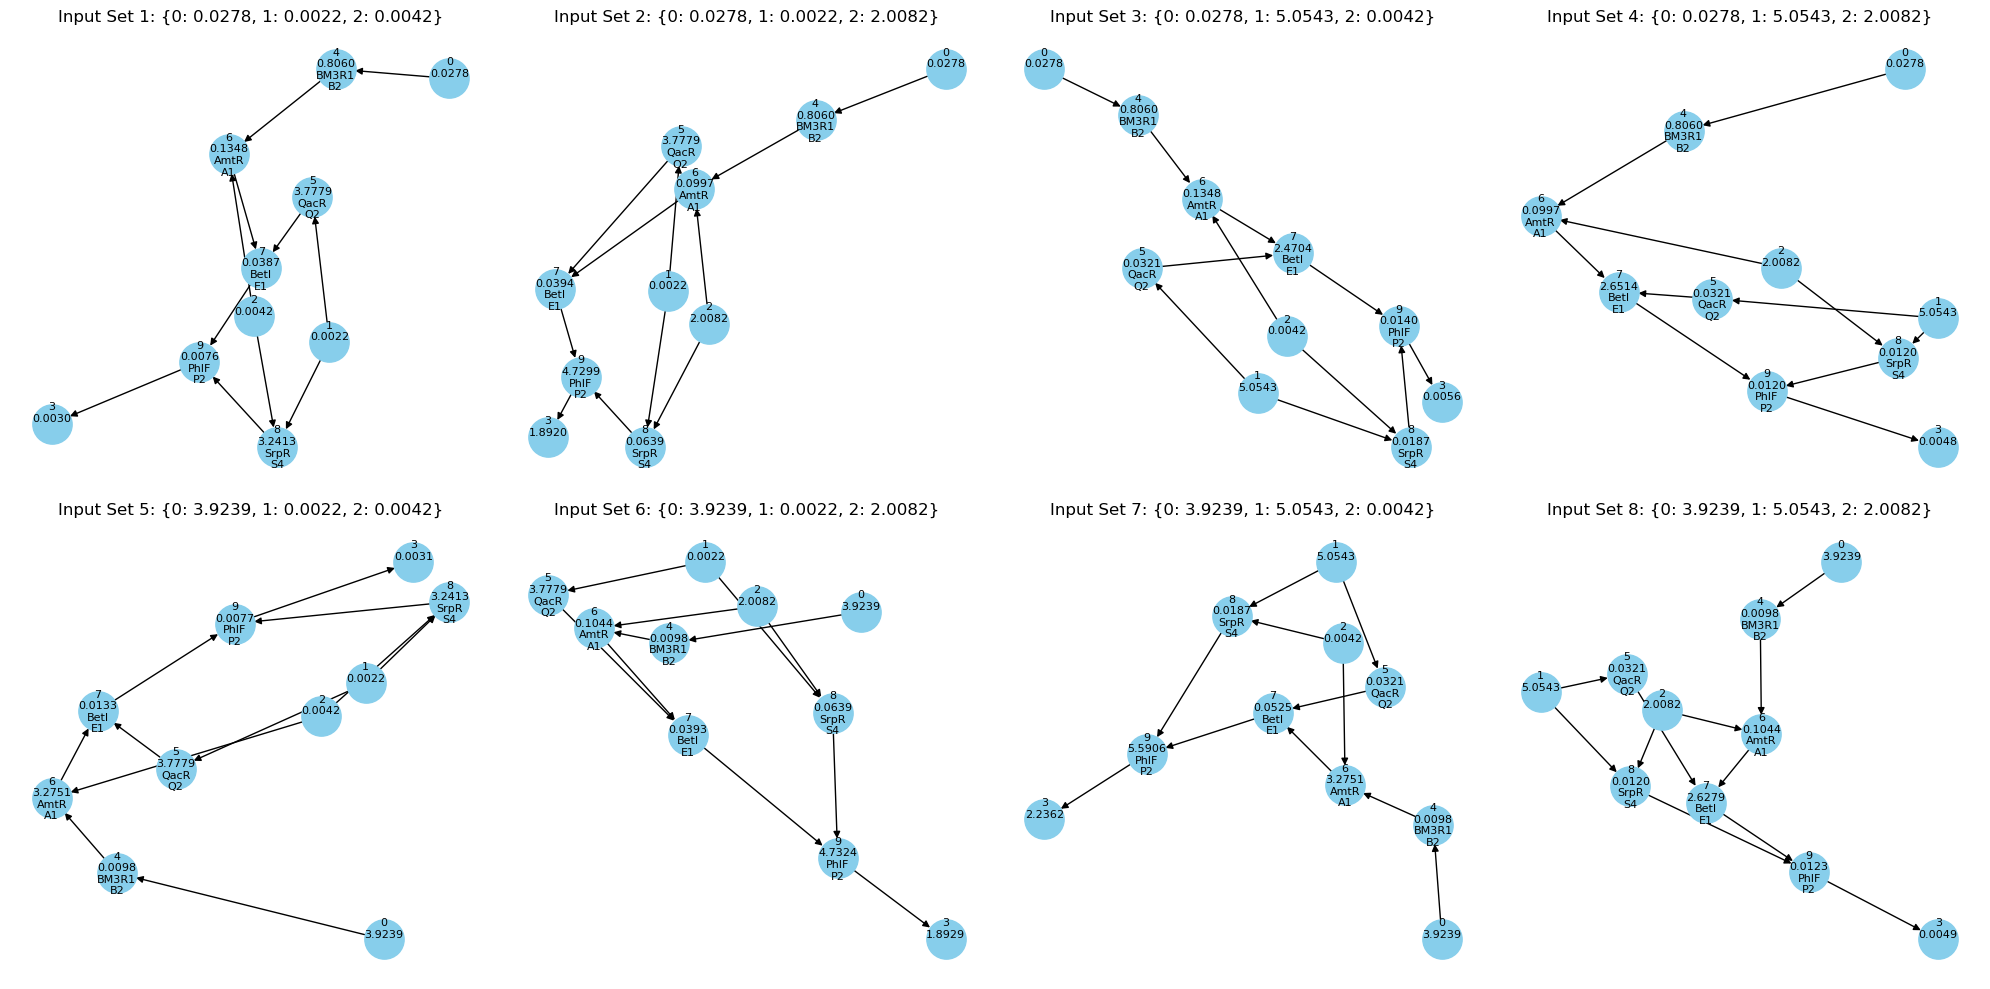

Current Score: 337.9852565861829


In [108]:
print("0x46 in binary is 01000110")
    
# Load the optimized graph (for testing)
G_optimized = load_graph("G_optimized_0x46_AI.graphml")


# Visualize signal propagation
def visualize_propagation(ax, G, all_signals, input_signals, title):
    pos = nx.spring_layout(G)
    labels = {
        node: f'{node}\n{output:.4f}\n{G.nodes[node].get("Repressor", "")}\n{G.nodes[node].get("RBS", "")}' 
        for node, output in all_signals.items()
    }
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', font_size=8, ax=ax)
    ax.set_title(title)

print("k is: ", k)
if check_implicit_OR_existence(G_optimized):
    G_optimized_with_implicit_OR = add_implicit_OR_to_dag(G_optimized)
    adj_matrix_sparse = nx.adjacency_matrix(G_optimized_with_implicit_OR)
    adj_matrix_dense = adj_matrix_sparse.toarray()
else:
    #G_optimized_with_implicit_OR = G_optimized
    adj_matrix_sparse = nx.adjacency_matrix(G_optimized)
    adj_matrix_dense = adj_matrix_sparse.toarray()

adj_matrix = adj_matrix_dense   

node_representation_indices = [4, 15, 1, 2, 19, 11]
Gp = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, node_representation_indices)    
    
input_signals_list_small_molecules = [
    {0: 0.0278, 1: 0.0022, 2: 0.0042},
    {0: 0.0278, 1: 0.0022, 2: 2.0082},
    {0: 0.0278, 1: 5.0543, 2: 0.0042},
    {0: 0.0278, 1: 5.0543, 2: 2.0082},
    {0: 3.9239, 1: 0.0022, 2: 0.0042},
    {0: 3.9239, 1: 0.0022, 2: 2.0082},
    {0: 3.9239, 1: 5.0543, 2: 0.0042},
    {0: 3.9239, 1: 5.0543, 2: 2.0082}
]

expected_logic = simulate_signal_propagation_binary(Gp, input_signals_list_binary)
actual_logic, all_signals_list = simulate_signal_propagation_test(Gp, input_signals_list_small_molecules)
current_score = calculate_circuit_score(expected_logic, actual_logic)

print(f"Expected digital logic: {expected_logic}")
formatted_logic = [
    {key: f"{value:.7f}" for key, value in item.items()} 
    if isinstance(item, dict) else item 
    for item in actual_logic
]
print(f"Actual digital logic: {formatted_logic}")

# Plotting in a 4x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Generate and display details for each input set
for i, (input_signals, all_signals, ax) in enumerate(zip(input_signals_list_small_molecules, all_signals_list, axes)):
    title = f'Input Set {i+1}: {input_signals}'
    visualize_propagation(ax, Gp, all_signals, input_signals, title)

plt.tight_layout()
plt.show()

print(f"Current Score: {current_score}")



In [109]:
# Print all_signals as a matrix

print("0x46 in binary is 01000110")

all_signals_matrix = pd.DataFrame(all_signals_list)
pd.set_option('display.float_format', '{:.6f}'.format)  # Set display format for floats
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set display width
print("\nActivity Matrix:")
print(all_signals_matrix)

0x46 in binary is 01000110

Activity Matrix:
         0        1        2        3        4        5        6        7        8        9
0 0.027800 0.002200 0.004200 0.003023 0.806035 3.777902 0.134825 0.038744 3.241338 0.007557
1 0.027800 0.002200 2.008200 1.891979 0.806035 3.777902 0.099660 0.039382 0.063858 4.729948
2 0.027800 5.054300 0.004200 0.005598 0.806035 0.032071 0.134825 2.470426 0.018733 0.013995
3 0.027800 5.054300 2.008200 0.004813 0.806035 0.032071 0.099660 2.651423 0.011987 0.012032
4 3.923900 0.002200 0.004200 0.003076 0.009787 3.777902 3.275131 0.013267 3.241338 0.007689
5 3.923900 0.002200 2.008200 1.892945 0.009787 3.777902 0.104367 0.039295 0.063858 4.732363
6 3.923900 5.054300 0.004200 2.236240 0.009787 0.032071 3.275131 0.052489 0.018733 5.590600
7 3.923900 5.054300 2.008200 0.004909 0.009787 0.032071 0.104367 2.627853 0.011987 0.012274


In [110]:
#Circuit Score by hand
1.8919791/0.0055978

337.98619100360855

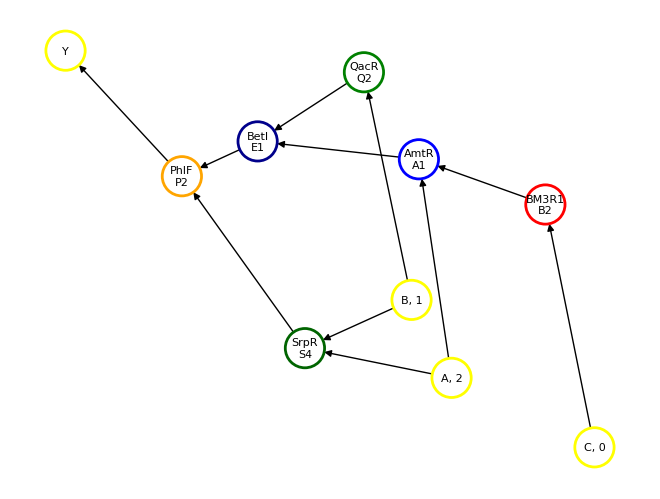

In [119]:
draw_network_with_colors_and_labels_from_G(Gp)

In depth analysis of toxicity score

Growth Scores Matrix:
         4        5        8        6        7        9
0 0.980624 1.000000 0.983135 0.932191 0.953794 0.945738
1 0.980624 1.000000 0.987703 0.962353 0.954197 0.938851
2 0.980624 0.940272 0.944885 0.932191 0.984439 0.940832
3 0.980624 0.940272 0.944885 0.962353 0.989139 0.943344
4 0.987490 1.000000 0.983135 1.000000 0.946395 0.945663
5 0.987490 1.000000 0.987703 1.000000 0.954143 0.938906
6 0.987490 0.940272 0.944885 1.000000 0.961300 0.963477
7 0.987490 0.940272 0.944885 1.000000 0.987167 0.943014

Intermediates Matrix:
         4        5        8        6        7        9
0 0.027800 0.002200 0.006400 0.810235 3.912727 3.280081
1 0.027800 0.002200 2.010400 2.814235 3.877562 0.103239
2 0.027800 5.054300 5.058500 0.810235 0.166896 2.489159
3 0.027800 5.054300 7.062500 2.814235 0.131731 2.663409
4 3.923900 0.002200 0.006400 0.013987 7.053032 3.254605
5 3.923900 0.002200 2.010400 2.017987 3.882269 0.103153
6 3.923900 5.054300 5.058500 0.013987 3.307201 0.071222
7 3

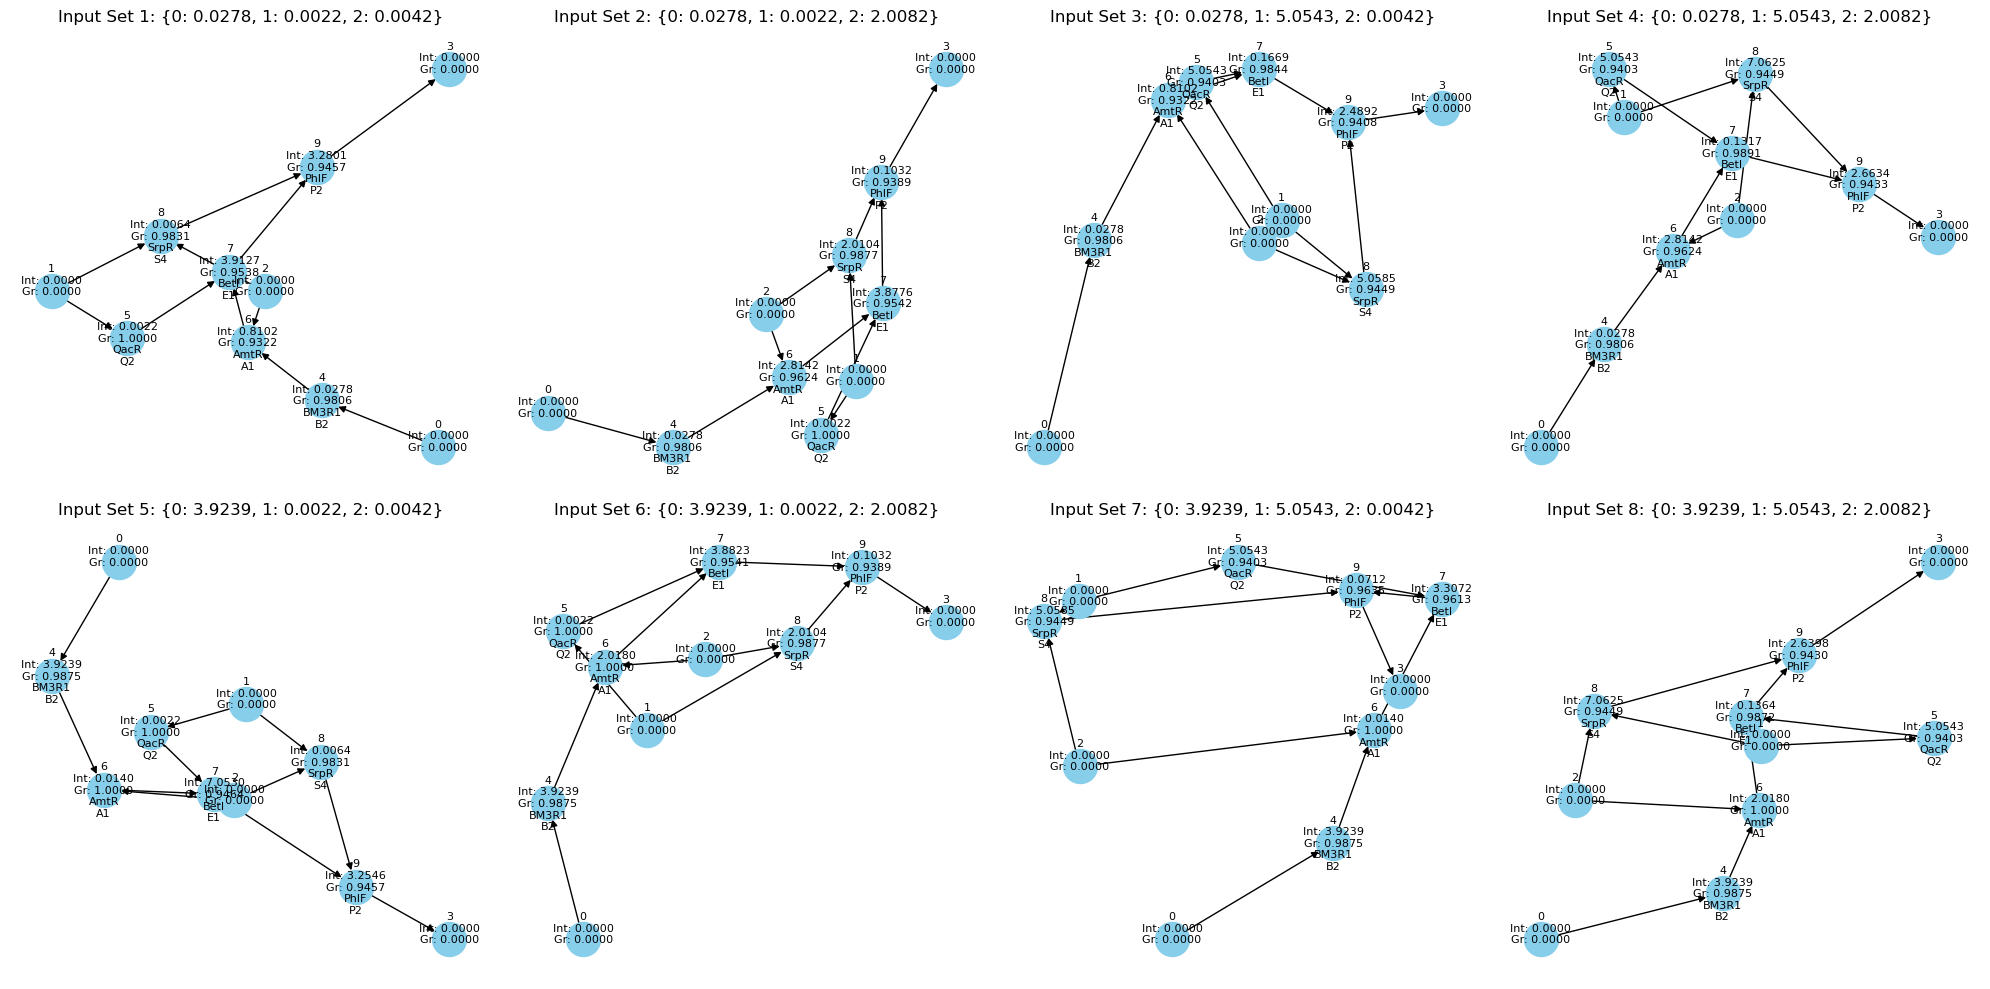

Toxicity Score: 0.7522136312360919


In [208]:
# Visualize signal propagation and toxicity calculation
def visualize_propagation(ax, G, input_signals, intermediates, growth_scores, title):
    pos = nx.spring_layout(G)
    labels = {}
    for node in G.nodes:
        intermediate_value = next((value for n, value in intermediates if n == node), 0)
        growth_score_value = next((value for n, value in growth_scores if n == node), 0)
        labels[node] = f'{node}\nInt: {intermediate_value:.4f}\nGr: {growth_score_value:.4f}\n{G.nodes[node].get("Repressor", "")}\n{G.nodes[node].get("RBS", "")}'
    
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=600, node_color='skyblue', font_size=8, ax=ax)
    ax.set_title(title)

toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, Gp, gate_toxicity_df)

# Prepare and print growth_scores as a matrix
growth_scores_matrix = pd.DataFrame(
    [[score for node, score in scores] for scores in detailed_results["growth_scores"]],
    columns=[node for node, score in detailed_results["growth_scores"][0]]
)
print("Growth Scores Matrix:")
print(growth_scores_matrix)

# Prepare and print intermediates as a matrix
intermediates_matrix = pd.DataFrame(
    [[value for node, value in intermediates] for intermediates in detailed_results["intermediates"]],
    columns=[node for node, value in detailed_results["intermediates"][0]]
)

# Set print options for numpy to avoid scientific notation
np.set_printoptions(suppress=True, precision=4)
print("\nIntermediates Matrix:")
print(intermediates_matrix)

# Print multiplied growth scores
print("\nMultiplied Growth Scores:")
for i, multiplied_score in enumerate(detailed_results["multiplied_growth_scores"]):
    print(f"Input Set {i+1}: {multiplied_score}")

# Plotting in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Generate and display details for each input set
for i, ax in enumerate(axes):
    input_signals = input_signals_list_small_molecules[i]
    intermediates = detailed_results["intermediates"][i]
    growth_scores = detailed_results["growth_scores"][i]
    
    title = f'Input Set {i+1}: {input_signals}'
    visualize_propagation(ax, Gp, input_signals, intermediates, growth_scores, title)

plt.tight_layout()
plt.show()

print(f"Toxicity Score: {toxicity_score}")


# In depth analysis of circuit score Cello design

In [190]:
#save_graph(permuted_graphs[0], "G_optimized_0x46_Cello.graphml")

# Load the optimized graph (for testing)
#G_optimized_loaded = load_graph("G_optimized_0x46_Cello.graphml")

In [198]:
title

'Input Set 1: {0: 0.0278, 1: 0.0022, 2: 0.0042}'

0x46 in binary is 01000110
Expected digital logic: [{4: 0}, {4: 1}, {4: 0}, {4: 0}, {4: 0}, {4: 1}, {4: 1}, {4: 0}]
Actual digital logic: [{4: '0.0233145'}, {4: '1.4470120'}, {4: '0.0117216'}, {4: '0.0287804'}, {4: '0.0344695'}, {4: '1.4470864'}, {4: '1.5071312'}, {4: '0.0288639'}]


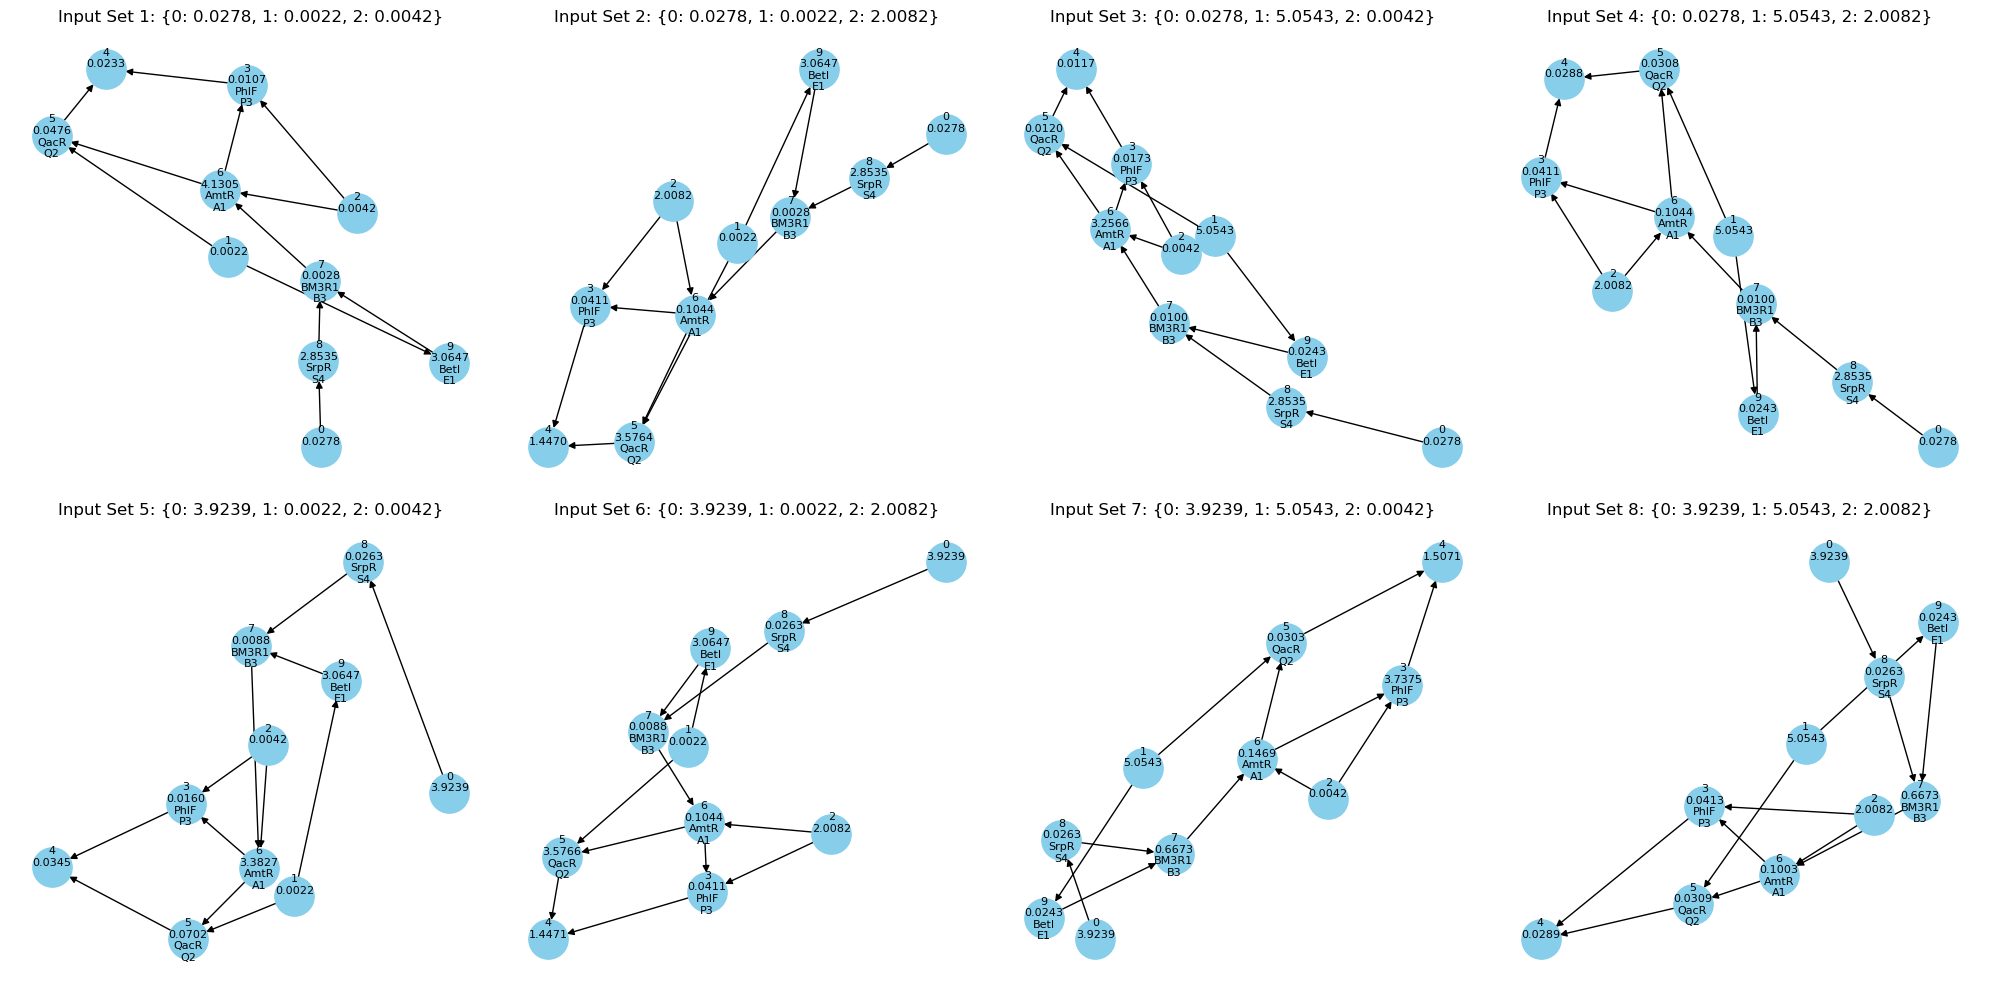

Current Score: 41.97947481591378


In [120]:
print("0x46 in binary is 01000110")
    
# Load the optimized graph (for testing)
G_optimized = load_graph("G_optimized_0x46_Cello.graphml")

node_representation_indices = [12, 15, 1, 5, 19, 2]

# Visualize signal propagation
def visualize_propagation(ax, G, all_signals, input_signals, title):
    pos = nx.spring_layout(G)
    labels = {
        node: f'{node}\n{output:.4f}\n{G.nodes[node].get("Repressor", "")}\n{G.nodes[node].get("RBS", "")}' 
        for node, output in all_signals.items()
    }
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', font_size=8, ax=ax)
    ax.set_title(title)

if check_implicit_OR_existence(G_optimized):
    G_optimized_with_implicit_OR = add_implicit_OR_to_dag(G_optimized)
    adj_matrix_sparse = nx.adjacency_matrix(G_optimized_with_implicit_OR)
    adj_matrix_dense = adj_matrix_sparse.toarray()
else:
    #G_optimized_with_implicit_OR = G_optimized
    adj_matrix_sparse = nx.adjacency_matrix(G_optimized)
    adj_matrix_dense = adj_matrix_sparse.toarray()

adj_matrix = adj_matrix_dense   


Gp = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, node_representation_indices)    
    
input_signals_list_small_molecules = [
    {0: 0.0278, 1: 0.0022, 2: 0.0042},
    {0: 0.0278, 1: 0.0022, 2: 2.0082},
    {0: 0.0278, 1: 5.0543, 2: 0.0042},
    {0: 0.0278, 1: 5.0543, 2: 2.0082},
    {0: 3.9239, 1: 0.0022, 2: 0.0042},
    {0: 3.9239, 1: 0.0022, 2: 2.0082},
    {0: 3.9239, 1: 5.0543, 2: 0.0042},
    {0: 3.9239, 1: 5.0543, 2: 2.0082}
]

expected_logic = simulate_signal_propagation_binary(Gp, input_signals_list_binary)
actual_logic, all_signals_list = simulate_signal_propagation_test(Gp, input_signals_list_small_molecules)
current_score = calculate_circuit_score(expected_logic, actual_logic)

print(f"Expected digital logic: {expected_logic}")
formatted_logic = [
    {key: f"{value:.7f}" for key, value in item.items()} 
    if isinstance(item, dict) else item 
    for item in actual_logic
]
print(f"Actual digital logic: {formatted_logic}")

# Plotting in a 4x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Generate and display details for each input set
for i, (input_signals, all_signals, ax) in enumerate(zip(input_signals_list_small_molecules, all_signals_list, axes)):
    title = f'Input Set {i+1}: {input_signals}'
    visualize_propagation(ax, Gp, all_signals, input_signals, title)

plt.tight_layout()
plt.show()

print(f"Current Score: {current_score}")



In [121]:
# Print all_signals as a matrix

print("0x46 in binary is 01000110")

all_signals_matrix = pd.DataFrame(all_signals_list)
pd.set_option('display.float_format', '{:.6f}'.format)  # Set display format for floats
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set display width
print("\nActivity Matrix:")
print(all_signals_matrix)

0x46 in binary is 01000110

Activity Matrix:
         0        1        2        3        4        5        6        7        8        9
0 0.027800 0.002200 0.004200 0.010717 0.023314 0.047570 4.130467 0.002813 2.853479 3.064736
1 0.027800 0.002200 2.008200 0.041139 1.447012 3.576391 0.104428 0.002813 2.853479 3.064736
2 0.027800 5.054300 0.004200 0.017254 0.011722 0.012050 3.256620 0.009963 2.853479 0.024348
3 0.027800 5.054300 2.008200 0.041141 0.028780 0.030810 0.104366 0.009963 2.853479 0.024348
4 3.923900 0.002200 0.004200 0.015990 0.034470 0.070184 3.382713 0.008795 0.026294 3.064736
5 3.923900 0.002200 2.008200 0.041141 1.447086 3.576575 0.104376 0.008795 0.026294 3.064736
6 3.923900 5.054300 0.004200 3.737511 1.507131 0.030317 0.146896 0.667251 0.026294 0.024348
7 3.923900 5.054300 2.008200 0.041302 0.028864 0.030858 0.100251 0.667251 0.026294 0.024348


In [122]:
#Circuit Score by hand


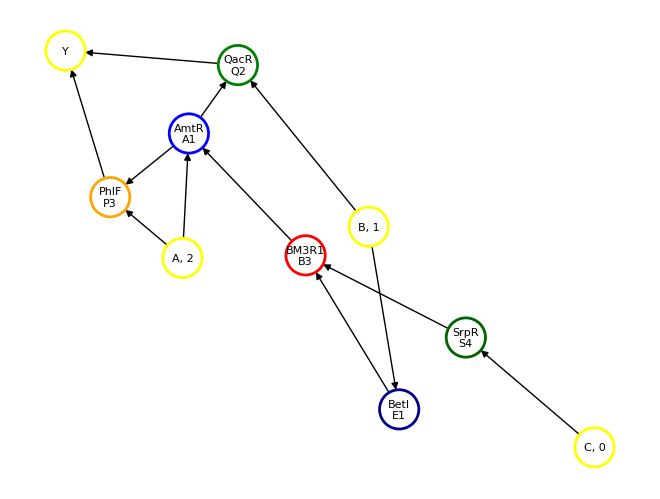

In [131]:
draw_network_with_colors_and_labels_from_G(Gp)

In depth analysis of toxicity score

Growth Scores Matrix:
         8        9        7        6        3        5
0 0.985998 1.000000 0.953149 0.995033 0.896821 0.943457
1 0.985998 1.000000 0.953149 1.000000 0.924010 1.000000
2 0.985998 0.946395 0.965941 1.000000 0.891130 0.940272
3 0.985998 0.946395 0.965941 1.000000 0.924014 0.940272
4 0.972086 1.000000 0.964008 1.000000 0.892040 0.949181
5 0.972086 1.000000 0.964008 1.000000 0.924014 1.000000
6 0.972086 0.946395 0.978814 0.926415 0.958210 0.940272
7 0.972086 0.946395 0.978814 0.962377 0.924338 0.940272

Intermediates Matrix:
         8        9        7        6        3        5
0 0.027800 0.002200 5.918215 0.007013 4.134667 4.132667
1 0.027800 0.002200 5.918215 2.011013 2.112628 0.106628
2 0.027800 5.054300 2.877827 0.014163 3.260820 8.310920
3 0.027800 5.054300 2.877827 2.018163 2.112566 5.158666
4 3.923900 0.002200 3.091030 0.012995 3.386913 3.384913
5 3.923900 0.002200 3.091030 2.016995 2.112576 0.106576
6 3.923900 5.054300 0.050642 0.671451 0.151096 5.201196
7 3

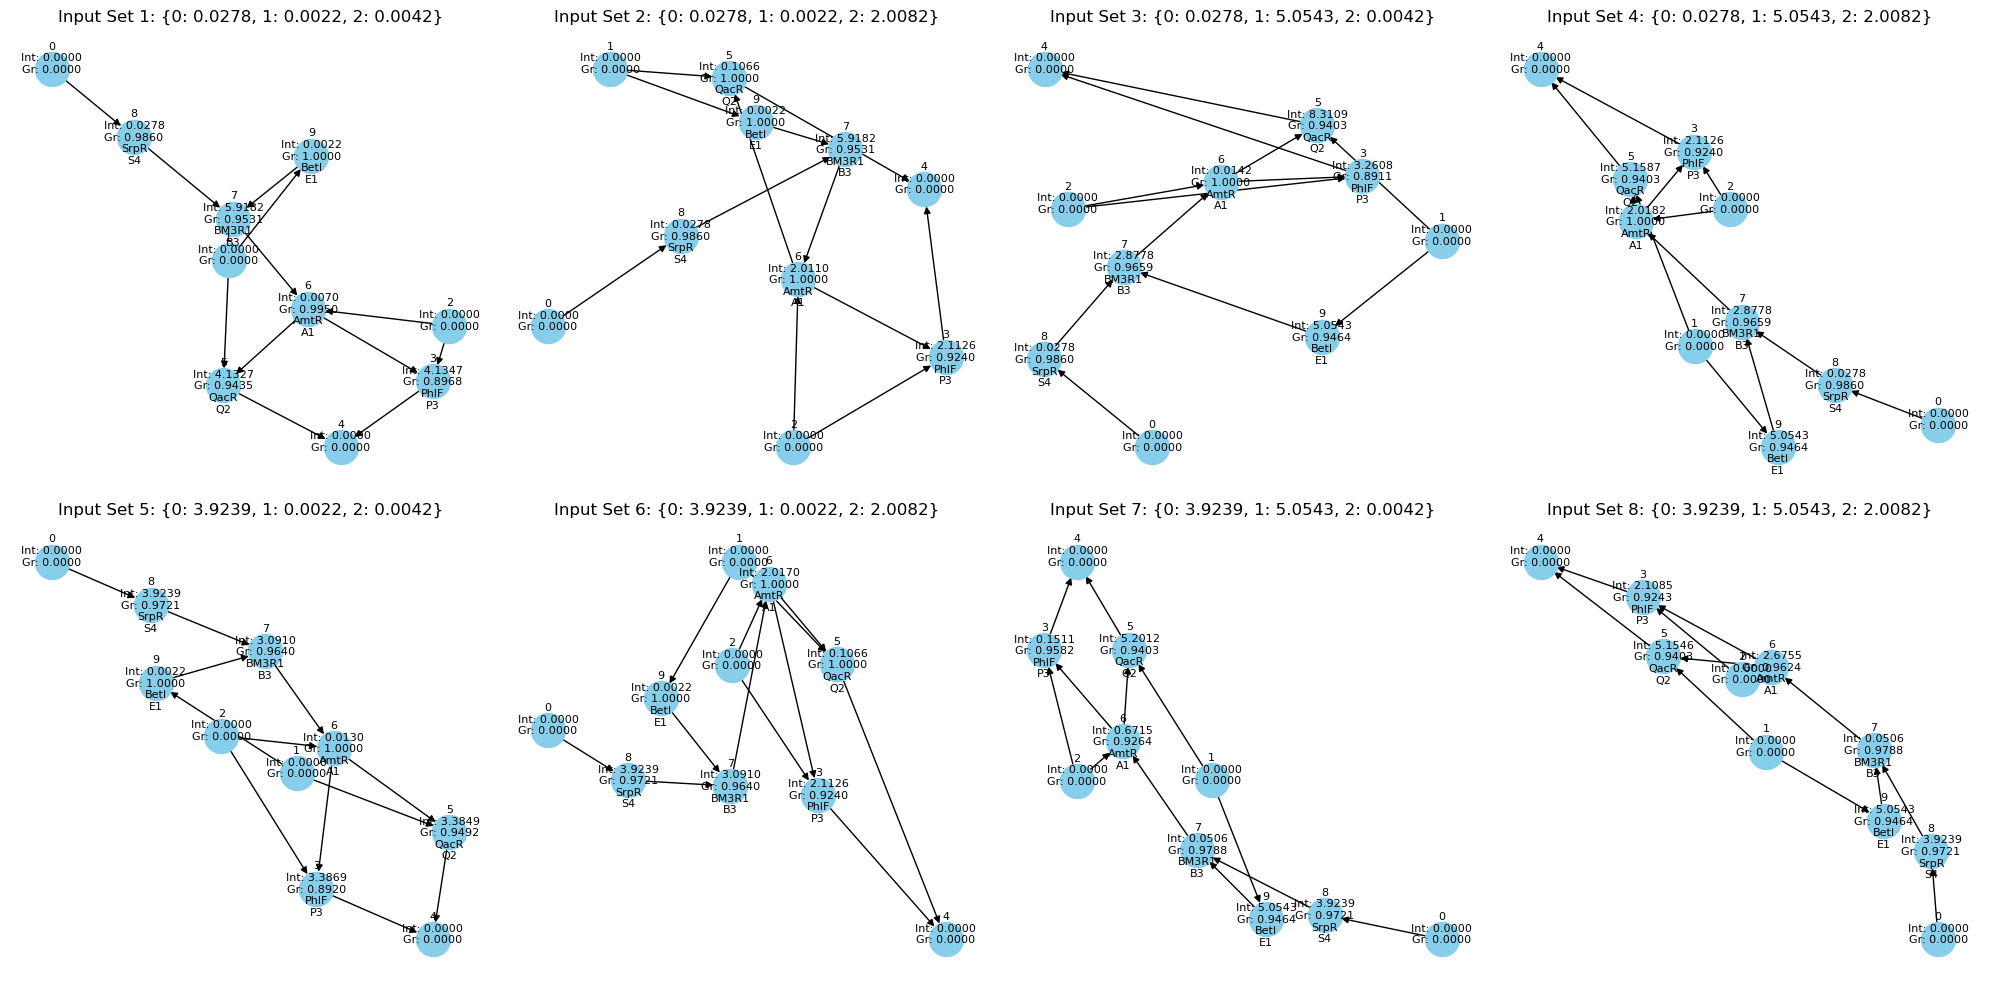

Toxicity Score: 0.751617841561374


In [124]:
# Visualize signal propagation and toxicity calculation
def visualize_propagation(ax, G, input_signals, intermediates, growth_scores, title):
    pos = nx.spring_layout(G)
    labels = {}
    for node in G.nodes:
        intermediate_value = next((value for n, value in intermediates if n == node), 0)
        growth_score_value = next((value for n, value in growth_scores if n == node), 0)
        labels[node] = f'{node}\nInt: {intermediate_value:.4f}\nGr: {growth_score_value:.4f}\n{G.nodes[node].get("Repressor", "")}\n{G.nodes[node].get("RBS", "")}'
    
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=600, node_color='skyblue', font_size=8, ax=ax)
    ax.set_title(title)

toxicity_score, detailed_results = calculate_toxicity_score(input_signals_list_small_molecules, Gp, gate_toxicity_df)

# Prepare and print growth_scores as a matrix
growth_scores_matrix = pd.DataFrame(
    [[score for node, score in scores] for scores in detailed_results["growth_scores"]],
    columns=[node for node, score in detailed_results["growth_scores"][0]]
)
print("Growth Scores Matrix:")
print(growth_scores_matrix)

# Prepare and print intermediates as a matrix
intermediates_matrix = pd.DataFrame(
    [[value for node, value in intermediates] for intermediates in detailed_results["intermediates"]],
    columns=[node for node, value in detailed_results["intermediates"][0]]
)

# Set print options for numpy to avoid scientific notation
np.set_printoptions(suppress=True, precision=4)
print("\nIntermediates Matrix:")
print(intermediates_matrix)

# Print multiplied growth scores
print("\nMultiplied Growth Scores:")
for i, multiplied_score in enumerate(detailed_results["multiplied_growth_scores"]):
    print(f"Input Set {i+1}: {multiplied_score}")

# Plotting in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Generate and display details for each input set
for i, ax in enumerate(axes):
    input_signals = input_signals_list_small_molecules[i]
    intermediates = detailed_results["intermediates"][i]
    growth_scores = detailed_results["growth_scores"][i]
    
    title = f'Input Set {i+1}: {input_signals}'
    visualize_propagation(ax, Gp, input_signals, intermediates, growth_scores, title)

plt.tight_layout()
plt.show()

print(f"Toxicity Score: {toxicity_score}")


# Some test of permutations

k is:  5
Original graph


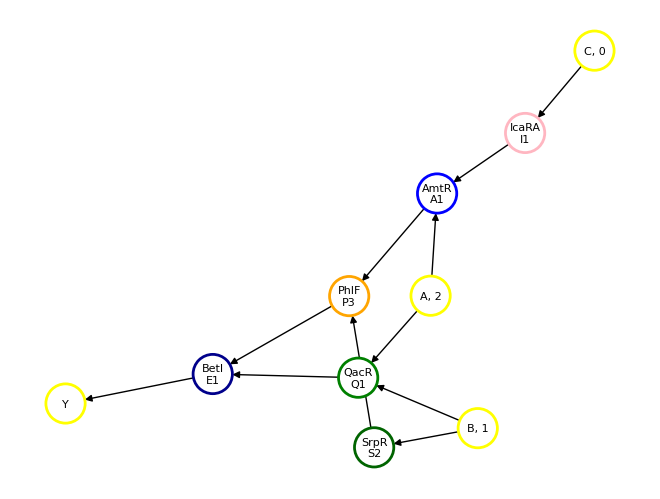

perm:  (0, 1, 2)
perm:  (0, 2, 1)
perm:  (1, 0, 2)
perm:  (1, 2, 0)
perm:  (2, 0, 1)
perm:  (2, 1, 0)


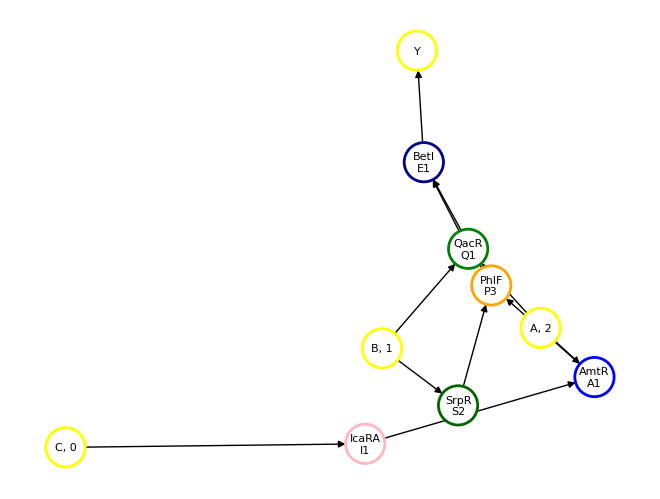

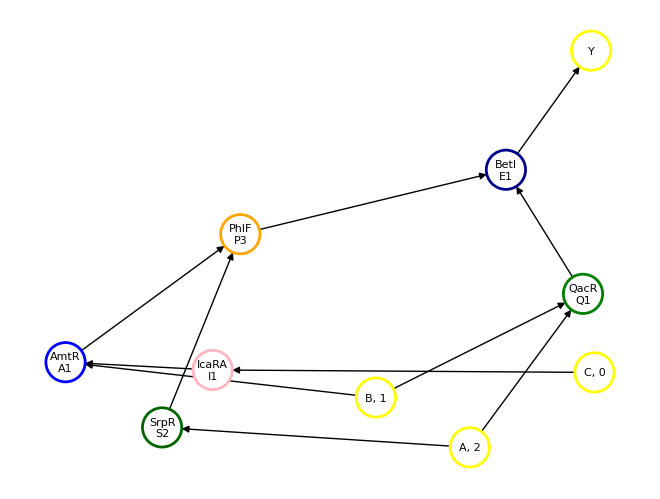

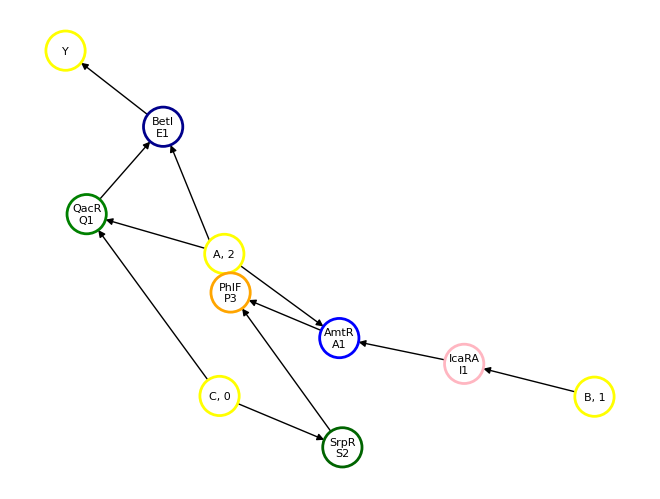

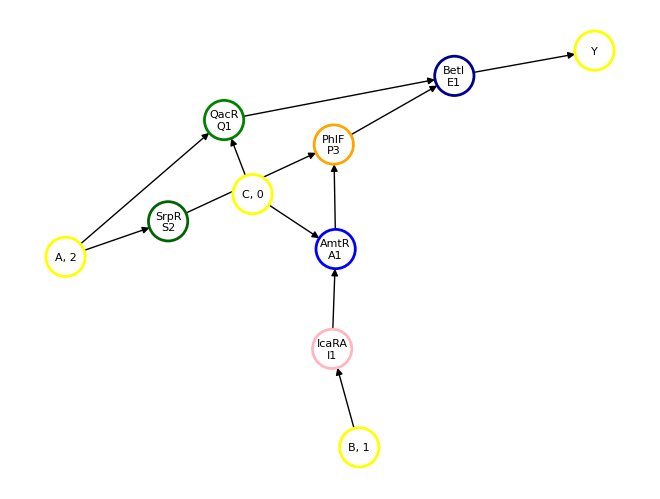

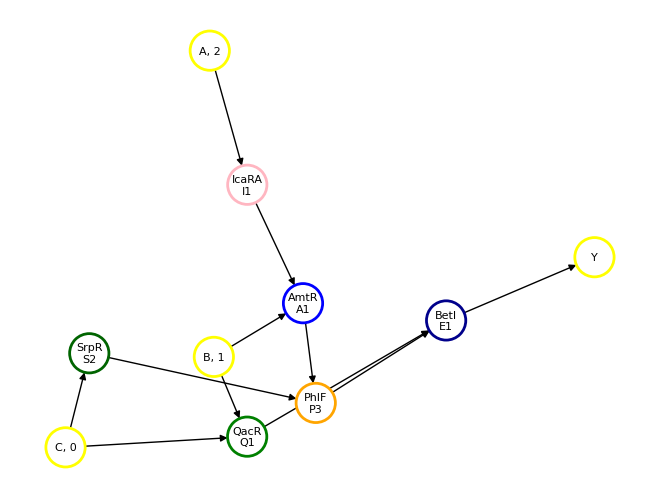

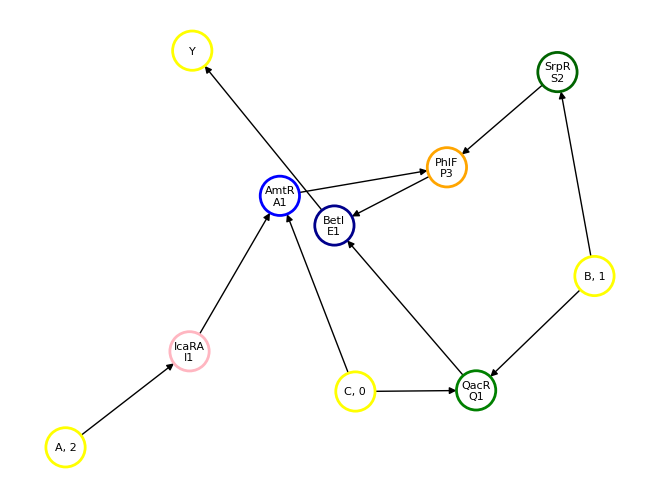

In [222]:
for k in [5]:

    G_optimized = unique_graphs_with_implicit_OR[k]
    print("k is: ", k)
    if check_implicit_OR_existence(G_optimized):
        G_optimized_with_implicit_OR = add_implicit_OR_to_dag(G_optimized)
        adj_matrix_sparse = nx.adjacency_matrix(G_optimized_with_implicit_OR)
        adj_matrix_dense = adj_matrix_sparse.toarray()
    else:
        #G_optimized_with_implicit_OR = G_optimized
        adj_matrix_sparse = nx.adjacency_matrix(G_optimized)
        adj_matrix_dense = adj_matrix_sparse.toarray()

    adj_matrix = adj_matrix_dense
    random_solution = random_part_selection(cello_v1_hill_function_parameters, 6)
    G_original = assign_representations_with_io_nodes_3(adj_matrix, cello_v1_hill_function_parameters, random_solution) 
    print("Original graph")
    draw_network_with_colors_and_labels_from_G(G_original)
    
    input_signals_list_small_molecules = [
        {0: 0.0278, 1: 0.0022, 2: 0.0042},  # First set of input signals
        {0: 0.0278, 1: 0.0022, 2: 2.0082},  # Second set of input signals
        {0: 0.0278, 1: 5.0543, 2: 0.0042},  # Third set of input signals
        {0: 0.0278, 1: 5.0543, 2: 2.0082},  # First set of input signals
        {0: 3.9239, 1: 0.0022, 2: 0.0042},  # Second set of input signals
        {0: 3.9239, 1: 0.0022, 2: 2.0082},  # Third set of input signals    
        {0: 3.9239, 1: 5.0543, 2: 0.0042},  # Second set of input signals
        {0: 3.9239, 1: 5.0543, 2: 2.0082},  # Third set of input signals  
    ]
    
    input_signals_list_binary = [
        {0: 0, 1: 0, 2: 0},  # First set of input signals
        {0: 0, 1: 0, 2: 1},  # Second set of input signals
        {0: 0, 1: 1, 2: 0},  # Third set of input signals
        {0: 0, 1: 1, 2: 1},  # First set of input signals
        {0: 1, 1: 0, 2: 0},  # Second set of input signals
        {0: 1, 1: 0, 2: 1},  # Third set of input signals    
        {0: 1, 1: 1, 2: 0},  # Second set of input signals
        {0: 1, 1: 1, 2: 1},  # Third set of input signals  
    ] 
    
    def permute_graph(graph, permutation):
        # Create a mapping from old node to new node
        mapping = {old: new for old, new in zip(input_nodes, permutation)}
        # Create a new graph with the permuted nodes
        permuted_graph = nx.relabel_nodes(graph, mapping)
        return permuted_graph
    
    
    # Define the input nodes
    input_nodes = [0, 1, 2]
    
    # Generate all permutations of the input nodes
    permutations = list(itertools.permutations(input_nodes))
    
    # Create a list to store the permuted graphs
    permuted_graphs_test = []
    
    # Generate and store the permuted graphs
    for perm in permutations:
        new_graph = permute_graph(G_original, perm)
        #if calculate_truth_table_v2(new_graph) == calculate_truth_table_v2(G_original):
        print("perm: ", perm)
        permuted_graphs_test.append(new_graph)
        
        
    # Plot all permuted graphs
    for i, graph in enumerate(permuted_graphs_test):
        #plt.figure()
        draw_network_with_colors_and_labels_from_G(graph)
        #plt.title(f'Permuted Graph {i}')
        
        #plt.show()        